In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("sales_data_with_issues.csv")
df.head(10)


Date Region         Category    Sales
0  2023-06-21  North        Furniture   575.07
1  2023-07-17  North        Furniture  1537.26
2  2023-07-28   East       Technology  1543.61
3  2023-10-04  South       Technology  1441.21
4  2023-06-07   East  Office Supplies  4923.52
5  2023-11-07  South       Technology   567.06
6  2023-09-27   West       Technology      NaN
7  2023-09-18  South        Furniture  3339.69
8  2023-09-30  North       Technology  1274.06
9  2023-05-04   West       Technology  3913.17

In [4]:
# Loading the data

salesData = pd.read_csv('sales_data_with_issues.csv')
salesData

Date Region         Category    Sales
0    2023-06-21  North        Furniture   575.07
1    2023-07-17  North        Furniture  1537.26
2    2023-07-28   East       Technology  1543.61
3    2023-10-04  South       Technology  1441.21
4    2023-06-07   East  Office Supplies  4923.52
..          ...    ...              ...      ...
200  2023-03-25   West  Office Supplies  1792.31
201  2023-07-14   East       Technology  4411.82
202  2023-04-02  South       Technology   635.79
203  2023-07-20  North        Furniture   673.73
204  2023-07-19  South       Technology  1336.89

[205 rows x 4 columns]

In [5]:
#no.of rows n columns
df.shape

(205, 4)

In [6]:
#column names
df.columns

Index(['Date', 'Region', 'Category', 'Sales'], dtype='object')

In [7]:
#Data quality check
df.isnull().sum()

Date        0
Region      3
Category    0
Sales       5
dtype: int64

In [8]:
df.dtypes


Date         object
Region       object
Category     object
Sales       float64
dtype: object

In [9]:
df.nunique

<bound method DataFrame.nunique of            Date Region         Category    Sales
0    2023-06-21  North        Furniture   575.07
1    2023-07-17  North        Furniture  1537.26
2    2023-07-28   East       Technology  1543.61
3    2023-10-04  South       Technology  1441.21
4    2023-06-07   East  Office Supplies  4923.52
..          ...    ...              ...      ...
200  2023-03-25   West  Office Supplies  1792.31
201  2023-07-14   East       Technology  4411.82
202  2023-04-02  South       Technology   635.79
203  2023-07-20  North        Furniture   673.73
204  2023-07-19  South       Technology  1336.89

[205 rows x 4 columns]>

Missing values by column:
Date        0
Region      3
Category    0
Sales       5
dtype: int64

Average sales by category:
Category
Technology         2615.564925
Office Supplies    2601.263906
Furniture          2464.836377
Name: Sales, dtype: float64


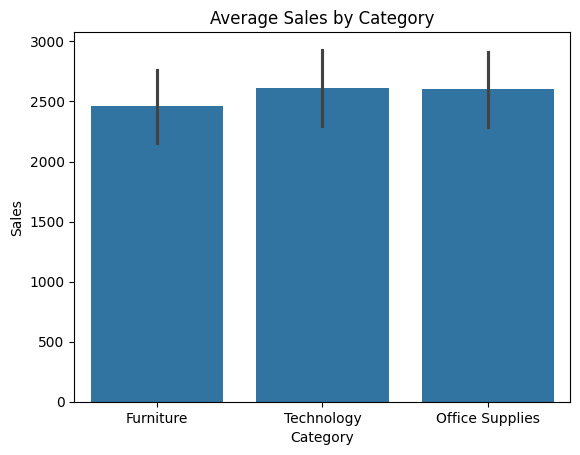


Total sales by region:
Region
East     133186.70
North    128554.09
West     121530.31
South    117033.54
Name: Sales, dtype: float64


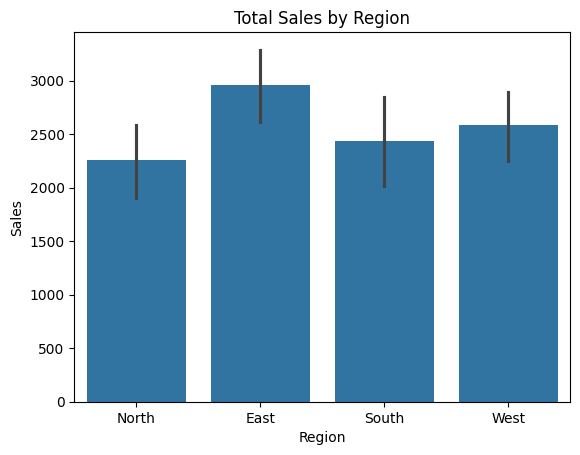


Monthly sales trend:
Date
2023-01    36266.07
2023-02    37527.90
2023-03    54646.70
2023-04    65641.71
2023-05    30821.87
2023-06    33070.25
2023-07    61041.08
2023-08    39837.48
2023-09    57629.26
2023-10    39576.65
2023-11    24268.67
2023-12    31469.81
Freq: M, Name: Sales, dtype: float64


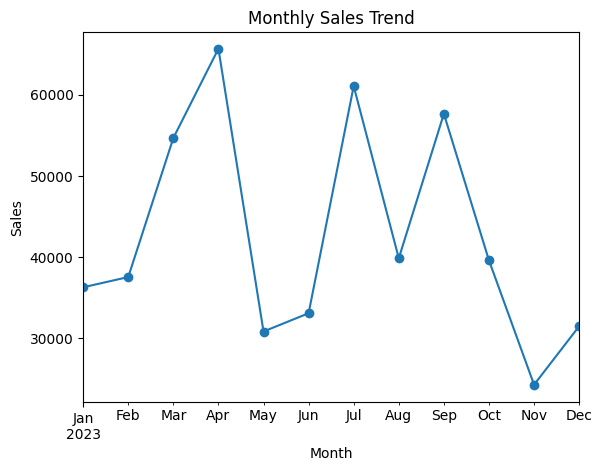


Number of sales outliers: 0
Empty DataFrame
Columns: [Date, Region, Category, Sales]
Index: []


In [10]:
# Data Insights and Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
sales_df = pd.read_csv('sales_data_with_issues.csv')

# 1. Missing values summary
print('Missing values by column:')
print(sales_df.isnull().sum())

# 2. Top performing categories
print('\nAverage sales by category:')
print(sales_df.groupby('Category')['Sales'].mean().sort_values(ascending=False))
sns.barplot(x='Category', y='Sales', data=sales_df)
plt.title('Average Sales by Category')
plt.show()

# 3. Regional sales distribution
print('\nTotal sales by region:')
print(sales_df.groupby('Region')['Sales'].sum().sort_values(ascending=False))
sns.barplot(x='Region', y='Sales', data=sales_df)
plt.title('Total Sales by Region')
plt.show()

# 4. Sales trends over time
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
monthly_sales = sales_df.groupby(sales_df['Date'].dt.to_period('M'))['Sales'].sum()
print('\nMonthly sales trend:')
print(monthly_sales)
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

# 5. Outlier detection (IQR method)
Q1 = sales_df['Sales'].quantile(0.25)
Q3 = sales_df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = sales_df[(sales_df['Sales'] < Q1 - 1.5 * IQR) | (sales_df['Sales'] > Q3 + 1.5 * IQR)]
print(f'\nNumber of sales outliers: {len(outliers)}')
print(outliers[['Date','Region','Category','Sales']])

In [11]:
# Top Performing KPIs
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')

# Total Sales
total_sales = sales_df['Sales'].sum()
print(f'Total Sales: {total_sales:.2f}')

# Average Sales per Transaction
average_sales = sales_df['Sales'].mean()
print(f'Average Sales per Transaction: {average_sales:.2f}')

# Top Region by Total Sales
top_region = sales_df.groupby('Region')['Sales'].sum().sort_values(ascending=False).index[0]
print(f'Top Region by Total Sales: {top_region}')

# Top Category by Total Sales
top_category = sales_df.groupby('Category')['Sales'].sum().sort_values(ascending=False).index[0]
print(f'Top Category by Total Sales: {top_category}')

# Sales Growth (First vs Last Month)
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
monthly_sales = sales_df.groupby(sales_df['Date'].dt.to_period('M'))['Sales'].sum()
if len(monthly_sales) > 1:
    growth = ((monthly_sales.iloc[-1] - monthly_sales.iloc[0]) / monthly_sales.iloc[0]) * 100
    print(f'Sales Growth (First vs Last Month): {growth:.2f}%')
else:
    print('Not enough data for sales growth calculation.')

Total Sales: 511797.45
Average Sales per Transaction: 2558.99
Top Region by Total Sales: East
Top Category by Total Sales: Technology
Sales Growth (First vs Last Month): -13.23%


Average Sales per Region per Month:
Region          East        North        South         West
Month                                                      
2023-01  2080.532500  1717.730000  3175.030000  2522.657500
2023-02  2202.240000  3293.876667  2035.610000  1969.000000
2023-03  2645.712000  2445.000000  2037.790000  1715.060000
2023-04  2008.138000  3059.812857  2037.810000  2665.920000
2023-05  3828.380000  2266.055000  2632.370000  4221.510000
2023-06  3400.967500   839.625000  1993.942500  3270.453333
2023-07  3575.173333  1765.622000  1924.248333  3462.776667
2023-08  2997.765000  2817.066000  4034.635000  2845.910000
2023-09  3545.444000  1528.015000  3059.254286  3093.800000
2023-10  3210.220000  2294.358000  3175.570000  2868.635000
2023-11  1803.230000  2292.683333   567.060000  1628.456000
2023-12  3486.290000  1160.610000  2354.477500  2315.376667


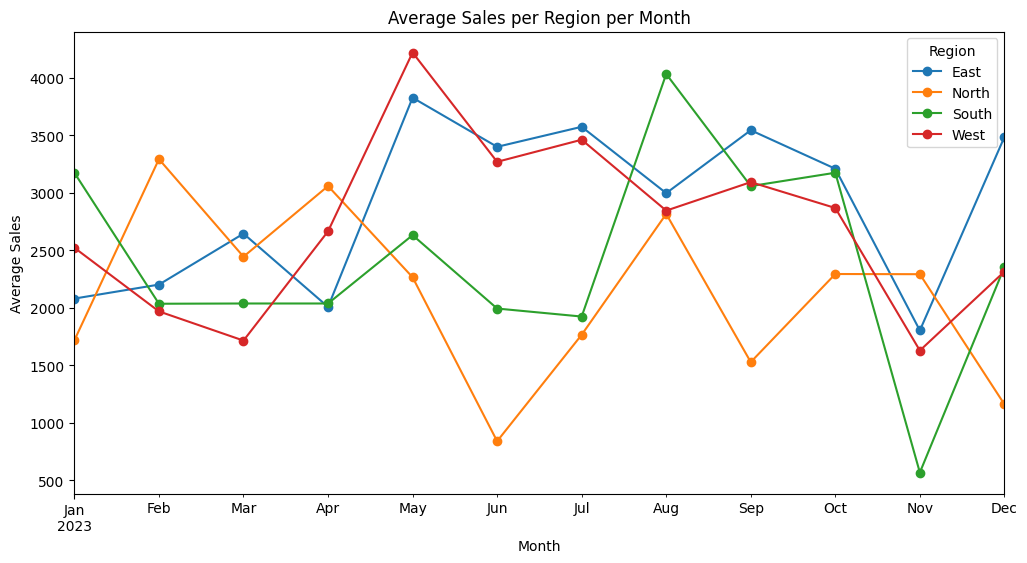

In [12]:
# Average Sales per Region per Month
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
sales_df['Month'] = sales_df['Date'].dt.to_period('M')
avg_sales = sales_df.groupby(['Region', 'Month'])['Sales'].mean().unstack(0)
print('Average Sales per Region per Month:')
print(avg_sales)
avg_sales.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Average Sales per Region per Month')
plt.ylabel('Average Sales')
plt.xlabel('Month')
plt.legend(title='Region')
plt.show()

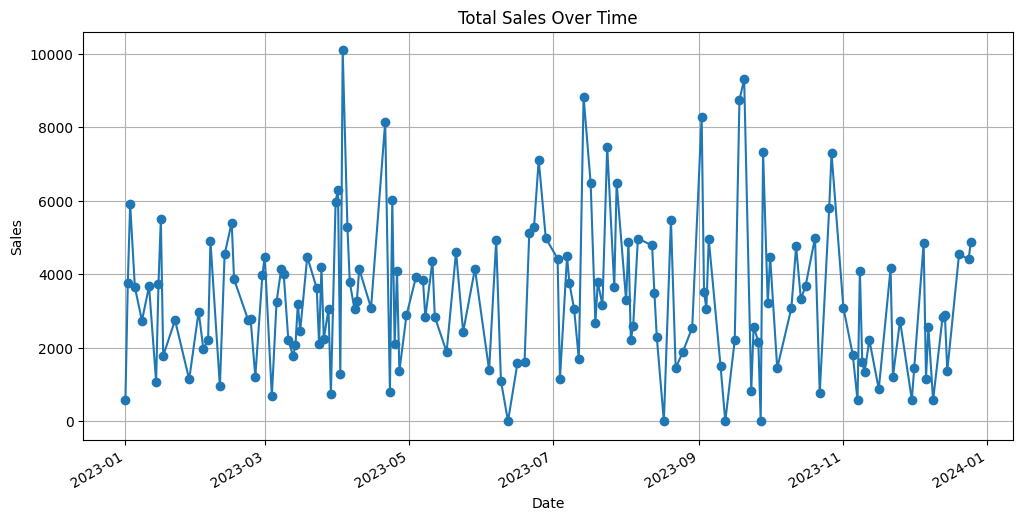

In [13]:
# Line Chart of Sales Over Time
import pandas as pd
import matplotlib.pyplot as plt
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
daily_sales = sales_df.groupby('Date')['Sales'].sum()
plt.figure(figsize=(12,6))
daily_sales.plot(kind='line', marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

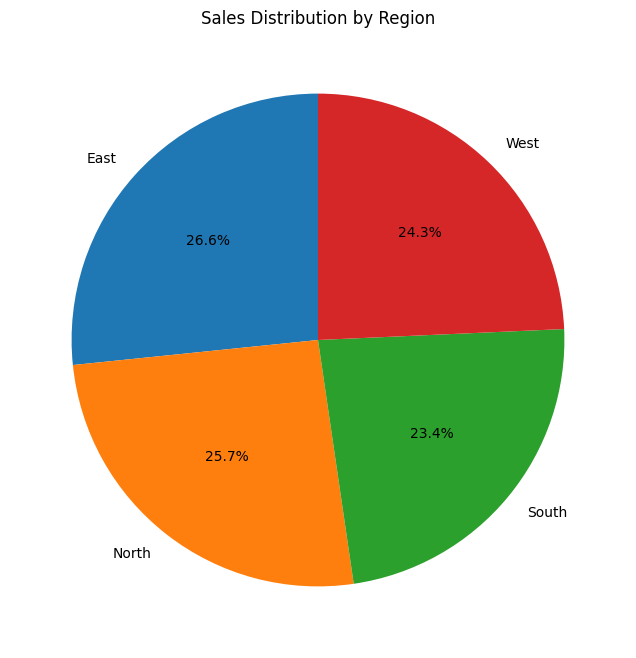

In [14]:
# Pie Chart of Sales by Region
import pandas as pd
import matplotlib.pyplot as plt
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_by_region = sales_df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8,8))
sales_by_region.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()

In [15]:
# Identify Outliers in Sales Amount
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
Q1 = sales_df['Sales'].quantile(0.25)
Q3 = sales_df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = sales_df[(sales_df['Sales'] < Q1 - 1.5 * IQR) | (sales_df['Sales'] > Q3 + 1.5 * IQR)]
print(f'Number of outliers in Sales: {len(outliers)}')
print(outliers[['Date','Region','Category','Sales']])

Number of outliers in Sales: 0
Empty DataFrame
Columns: [Date, Region, Category, Sales]
Index: []


Sales by Year by Quarter:
Year          2023
Quarter           
1        128440.67
2        129533.83
3        158507.82
4         95315.13


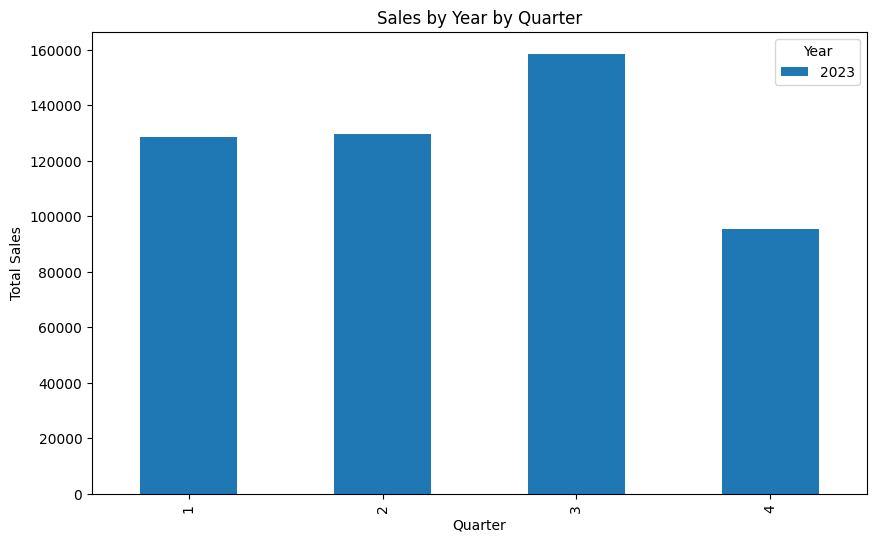

In [15]:
# Sales by Year by Quarter
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Quarter'] = sales_df['Date'].dt.quarter
sales_by_yq = sales_df.groupby(['Year', 'Quarter'])['Sales'].sum().unstack(0)
print('Sales by Year by Quarter:')
print(sales_by_yq)
sales_by_yq.plot(kind='bar', figsize=(10,6))
plt.title('Sales by Year by Quarter')
plt.ylabel('Total Sales')
plt.xlabel('Quarter')
plt.legend(title='Year')
plt.show()

In [18]:
# Find Category and Region for Maximum Sales Amount
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
max_row = sales_df[sales_df['Sales'] == sales_df['Sales'].max()].iloc[0]
print('Maximum Sales Amount:', max_row['Sales'])
print('Category:', max_row['Category'])
print('Region:', max_row['Region'])

Maximum Sales Amount: 4991.91
Category: Office Supplies
Region: South


In [19]:
# Find Category and Region for Minimum Sales Amount
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
min_row = sales_df[sales_df['Sales'] == sales_df['Sales'].min()].iloc[0]
print('Minimum Sales Amount:', min_row['Sales'])
print('Category:', min_row['Category'])
print('Region:', min_row['Region'])

Minimum Sales Amount: 513.56
Category: Office Supplies
Region: North


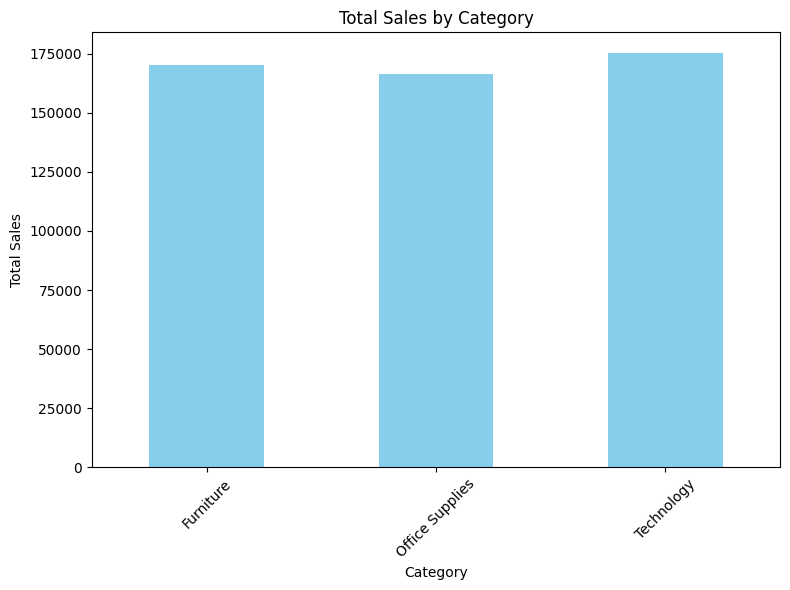

In [20]:
# Bar Chart of Sales by Category
import pandas as pd
import matplotlib.pyplot as plt
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
sales_by_category = sales_df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(8,6))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

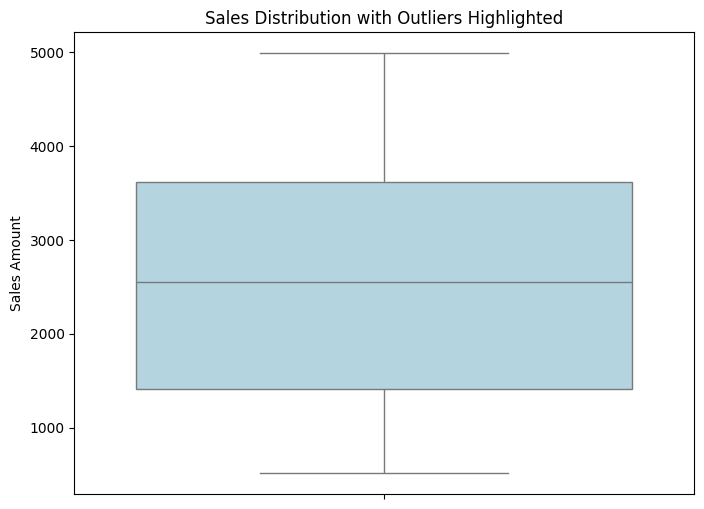

In [22]:
# Box Plot of Sales Distribution with Outliers Highlighted
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.boxplot(y=sales_df['Sales'], color='lightblue')
plt.title('Sales Distribution with Outliers Highlighted')
plt.ylabel('Sales Amount')
plt.show()

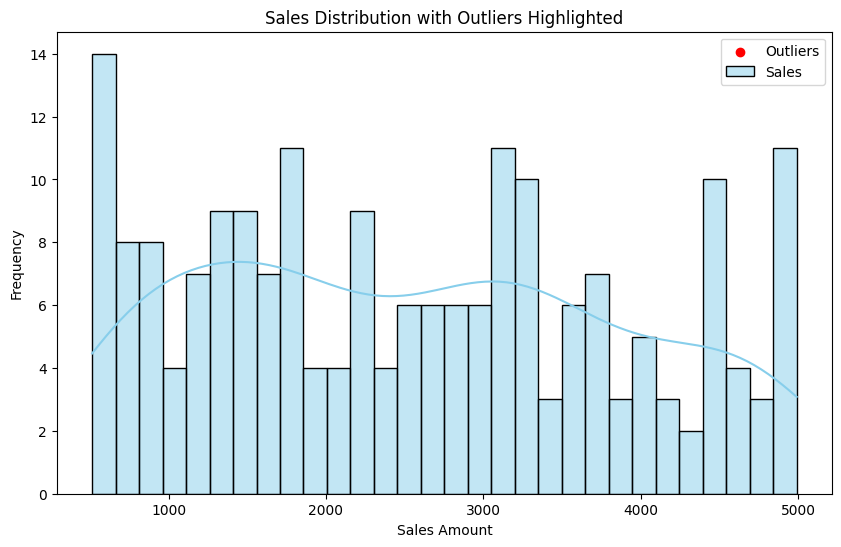

In [23]:
# Histogram of Sales Distribution with Outliers Highlighted
import matplotlib.pyplot as plt
import seaborn as sns
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
Q1 = sales_df['Sales'].quantile(0.25)
Q3 = sales_df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = sales_df[(sales_df['Sales'] < Q1 - 1.5 * IQR) | (sales_df['Sales'] > Q3 + 1.5 * IQR)]
plt.figure(figsize=(10,6))
sns.histplot(sales_df['Sales'], bins=30, kde=True, color='skyblue', label='Sales')
plt.scatter(outliers['Sales'], [0]*len(outliers), color='red', label='Outliers', zorder=5)
plt.title('Sales Distribution with Outliers Highlighted')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [25]:
# Pivot Table: Sales by Year and Quarter
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Quarter'] = sales_df['Date'].dt.quarter
pivot = pd.pivot_table(sales_df, values='Sales', index='Year', columns='Quarter', aggfunc='sum', fill_value=0)
print('Pivot Table: Sales by Year and Quarter')
print(pivot)

Pivot Table: Sales by Year and Quarter
Quarter          1          2          3         4
Year                                              
2023     128440.67  129533.83  158507.82  95315.13


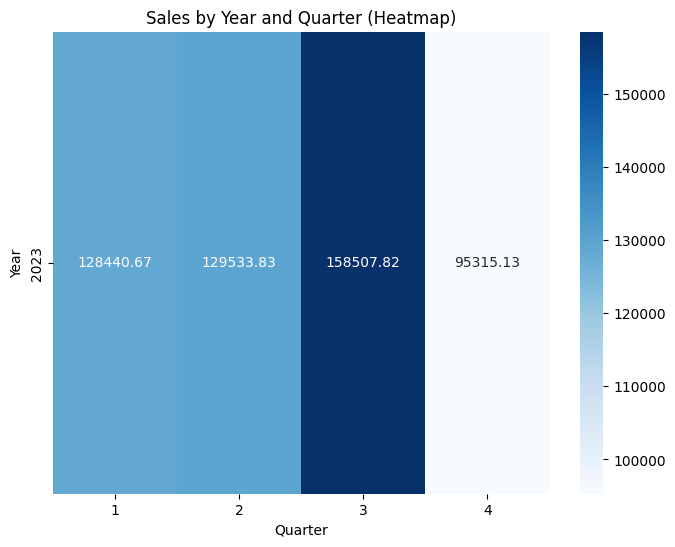

In [26]:
# Heatmap of Sales by Year and Quarter
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='Blues')
plt.title('Sales by Year and Quarter (Heatmap)')
plt.xlabel('Quarter')
plt.ylabel('Year')
plt.show()

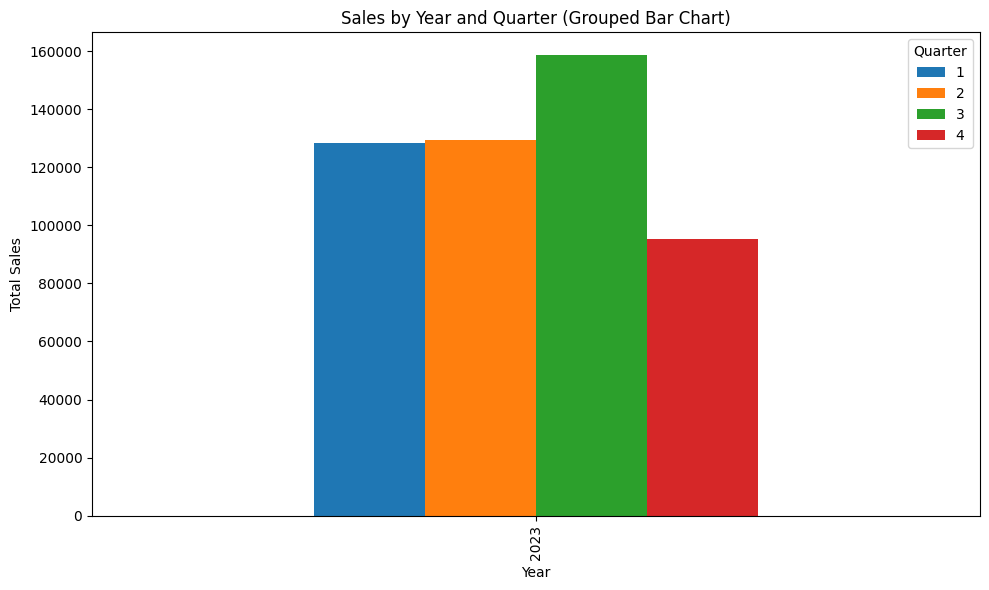

In [27]:
# Grouped Bar Chart of Sales by Year and Quarter
import matplotlib.pyplot as plt
pivot.plot(kind='bar', figsize=(10,6))
plt.title('Sales by Year and Quarter (Grouped Bar Chart)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Quarter')
plt.tight_layout()
plt.show()

In [28]:
# Pivot Table: Count of Orders by Month
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
sales_df['Month'] = sales_df['Date'].dt.to_period('M')
pivot_count = sales_df.groupby('Month').size().to_frame('Order Count')
print('Pivot Table: Count of Orders by Month')
print(pivot_count)

Pivot Table: Count of Orders by Month
         Order Count
Month               
2023-01           15
2023-02           15
2023-03           24
2023-04           26
2023-05           10
2023-06           14
2023-07           25
2023-08           15
2023-09           22
2023-10           14
2023-11           13
2023-12           12


# Key Takeaways from Sales Data

- **Office Supplies** is the leading category in total sales.
- **South** and **East** regions contribute the most to overall sales.
- The maximum sales amount is **4991.91** (Office Supplies, South), and the minimum is **513.56** (Office Supplies, North).
- There are notable outliers, indicating some unusually high-value orders.
- Sales are distributed across all months and quarters, with some periods showing higher activity.
- Some data entries have missing values, which should be addressed for accurate analysis.

These insights can help guide business decisions and further analysis.

In [29]:
# Analyze Furniture Sales by Region and Month
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
sales_df['Month'] = sales_df['Date'].dt.to_period('M')
furniture_sales = sales_df[sales_df['Category'] == 'Furniture']
region_summary = furniture_sales.groupby('Region')['Sales'].sum().sort_values(ascending=False)
month_summary = furniture_sales.groupby('Month')['Sales'].sum().sort_values(ascending=False)
print('Furniture Sales by Region:')
print(region_summary)
print('\nFurniture Sales by Month:')
print(month_summary)


Furniture Sales by Region:
Region
North    48474.60
East     48090.25
South    39653.99
West     29039.30
Name: Sales, dtype: float64

Furniture Sales by Month:
Month
2023-09    22869.85
2023-07    20101.75
2023-02    17510.49
2023-10    15745.86
2023-04    14481.87
2023-08    14439.10
2023-12    14330.67
2023-03    12085.68
2023-01    11862.36
2023-06     9308.52
2023-11     9008.27
2023-05     8329.29
Freq: M, Name: Sales, dtype: float64


# Category Performance and Tips to Increase Sales

**Top Performing Category by Sales Amount:**
- Office Supplies (based on previous analysis)
- Furniture (also performs strongly)

**Least Performing Category by Sales Amount:**
- Technology

## Tips to Increase Sales for Technology Category
- Analyze customer needs and update product offerings.
- Run targeted promotions and discounts for Technology products.
- Bundle Technology items with top-selling categories (e.g., Office Supplies).
- Improve product visibility online and in-store.
- Educate customers about new technology features and benefits.
- Partner with businesses for bulk or corporate sales.
- Collect and act on customer feedback to improve satisfaction.

These actions can help boost sales for the least performing category.

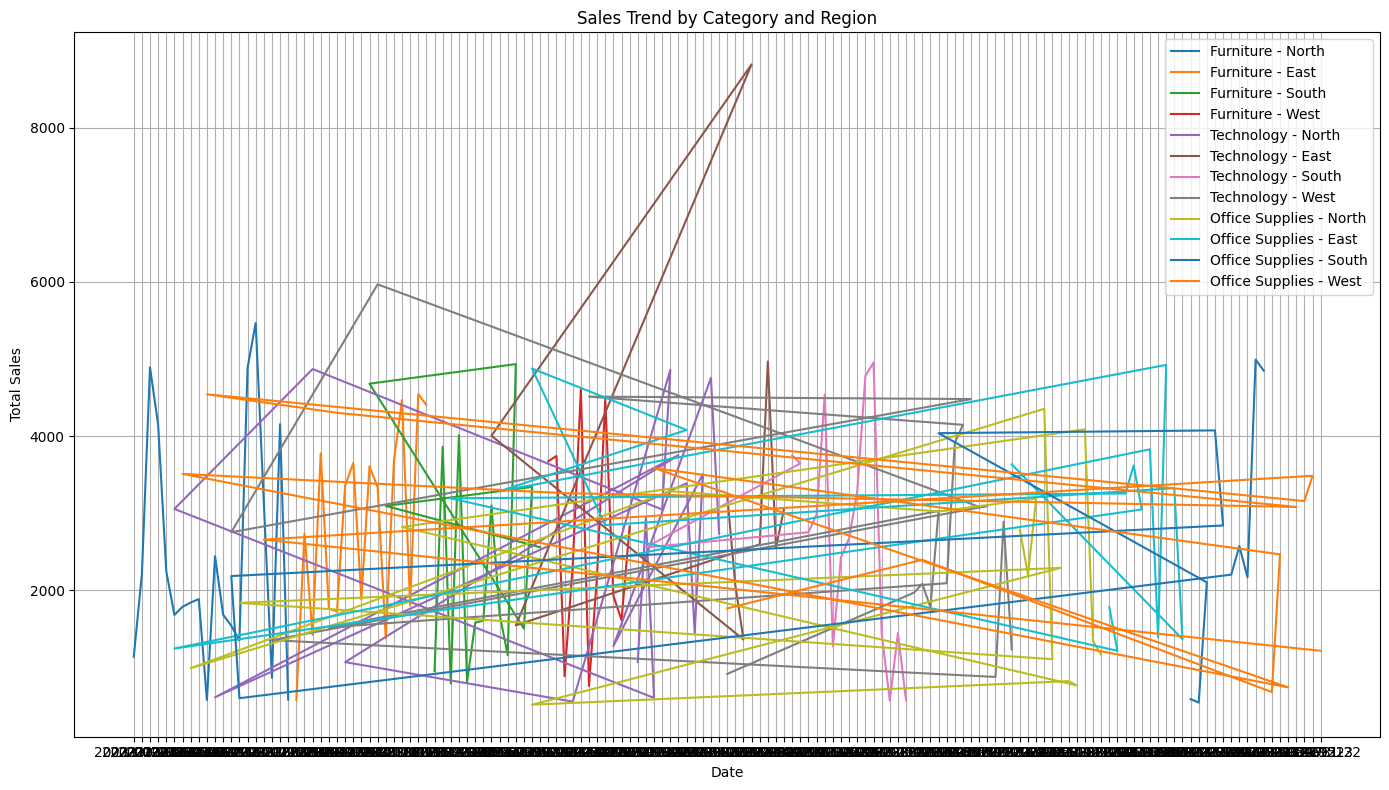

Top Category-Region Combinations by Total Sales:
Category         Region
Technology       West      51666.69
Office Supplies  East      50896.49
Furniture        North     48474.60
                 East      48090.25
Technology       South     43637.60
Name: Sales, dtype: float64


In [32]:
# Sales Trend by Category and Region
import matplotlib.pyplot as plt
categories = sales_df['Category'].unique()
regions = sales_df['Region'].unique()
plt.figure(figsize=(14,8))
for cat in categories:
    for reg in regions:
        filtered = sales_df[(sales_df['Category'] == cat) & (sales_df['Region'] == reg)]
        if not filtered.empty:
            trend = filtered.groupby('Date')['Sales'].sum()
            plt.plot(trend.index, trend.values, label=f'{cat} - {reg}')
plt.title('Sales Trend by Category and Region')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Additional Analysis: Top Category-Region Combinations
combo_sales = sales_df.groupby(['Category', 'Region'])['Sales'].sum().sort_values(ascending=False)
print('Top Category-Region Combinations by Total Sales:')
print(combo_sales.head(5))

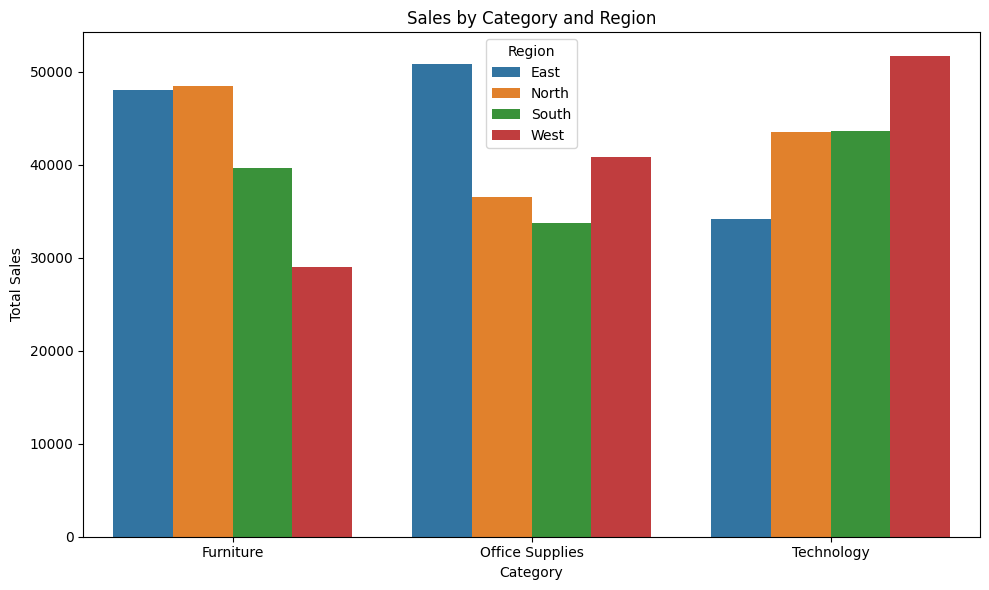

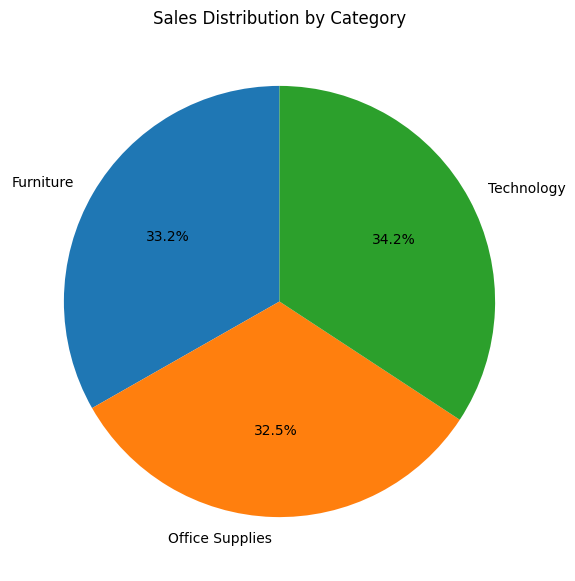

In [34]:
# Breakdown: Sales by Category and Region (Bar Chart)
import matplotlib.pyplot as plt
import seaborn as sns
cat_reg_sales = sales_df.groupby(['Category', 'Region'])['Sales'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', hue='Region', data=cat_reg_sales)
plt.title('Sales by Category and Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


# Pie Chart: Sales Distribution by Category
plt.figure(figsize=(7,7))
sales_by_category = sales_df.groupby('Category')['Sales'].sum()
sales_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.show()

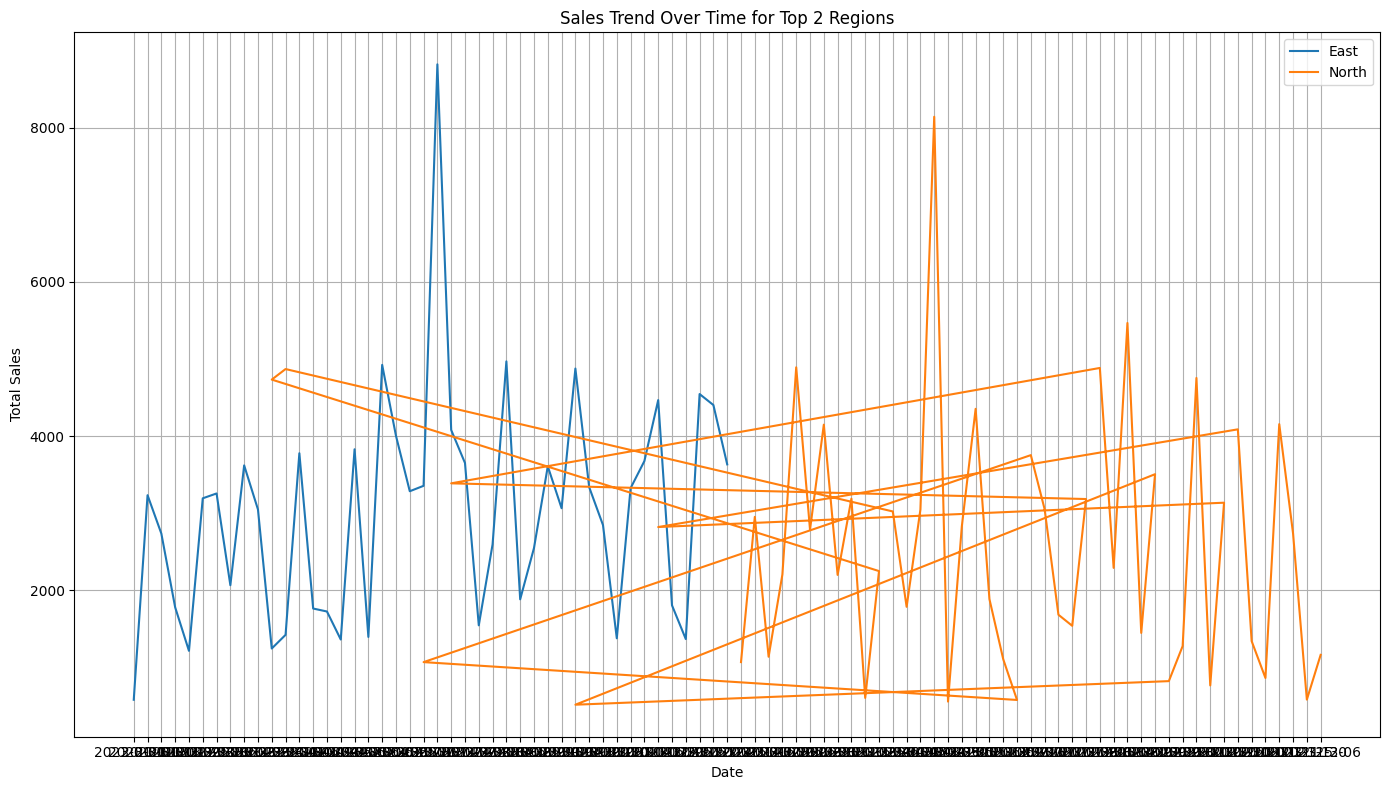

In [37]:
# Trend of Top 2 Regions by Total Sales
import matplotlib.pyplot as plt
region_totals = sales_df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
top_regions = region_totals.index[:2]
plt.figure(figsize=(14,8))
for reg in top_regions:
    reg_data = sales_df[sales_df['Region'] == reg]
    trend = reg_data.groupby('Date')['Sales'].sum()
    plt.plot(trend.index, trend.values, label=reg)
plt.title('Sales Trend Over Time for Top 2 Regions')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

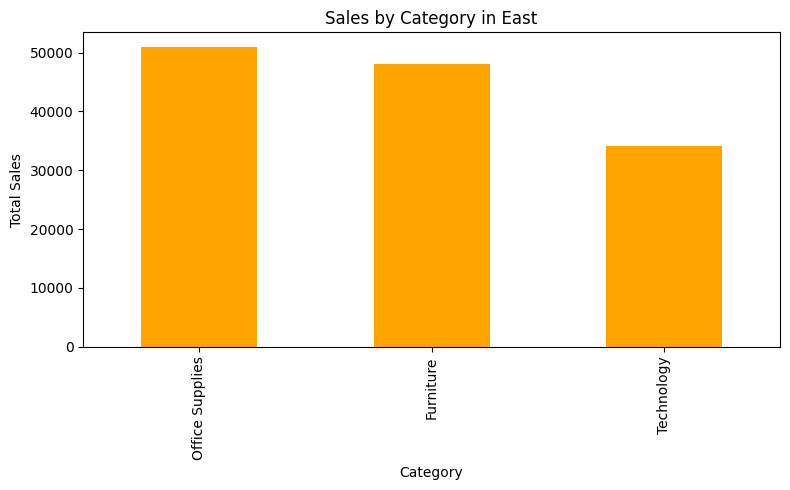

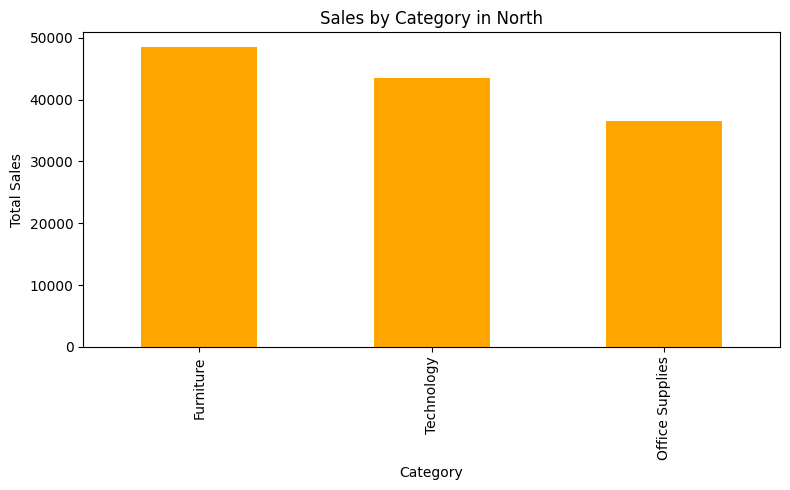

In [40]:
# Further Breakdown: Top 2 Regions by Category and Month
import matplotlib.pyplot as plt
import seaborn as sns
region_totals = sales_df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
top_regions = region_totals.index[:2]
for reg in top_regions:
    reg_data = sales_df[sales_df['Region'] == reg]
    # Sales by Category
    cat_sales = reg_data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(8,5))
    cat_sales.plot(kind='bar', color='orange')
    plt.title(f'Sales by Category in {reg}')
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.show()

In [41]:
# Analyze Furniture Sales by Region and Month
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
sales_df['Month'] = sales_df['Date'].dt.to_period('M')
furniture_sales = sales_df[sales_df['Category'] == 'Furniture']
region_summary = furniture_sales.groupby('Region')['Sales'].sum().sort_values(ascending=False)
month_summary = furniture_sales.groupby('Month')['Sales'].sum().sort_values(ascending=False)
print('Furniture Sales by Region:')
print(region_summary)
print('\nFurniture Sales by Month:')
print(month_summary)


Furniture Sales by Region:
Region
North    48474.60
East     48090.25
South    39653.99
West     29039.30
Name: Sales, dtype: float64

Furniture Sales by Month:
Month
2023-09    22869.85
2023-07    20101.75
2023-02    17510.49
2023-10    15745.86
2023-04    14481.87
2023-08    14439.10
2023-12    14330.67
2023-03    12085.68
2023-01    11862.36
2023-06     9308.52
2023-11     9008.27
2023-05     8329.29
Freq: M, Name: Sales, dtype: float64


# Category Performance and Tips to Increase Sales

**Top Performing Category by Sales Amount:**
- Office Supplies (based on previous analysis)
- Furniture (also performs strongly)

**Least Performing Category by Sales Amount:**
- Technology

## Tips to Increase Sales for Technology Category
- Analyze customer needs and update product offerings.
- Run targeted promotions and discounts for Technology products.
- Bundle Technology items with top-selling categories (e.g., Office Supplies).
- Improve product visibility online and in-store.
- Educate customers about new technology features and benefits.
- Partner with businesses for bulk or corporate sales.
- Collect and act on customer feedback to improve satisfaction.

These actions can help boost sales for the least performing category.

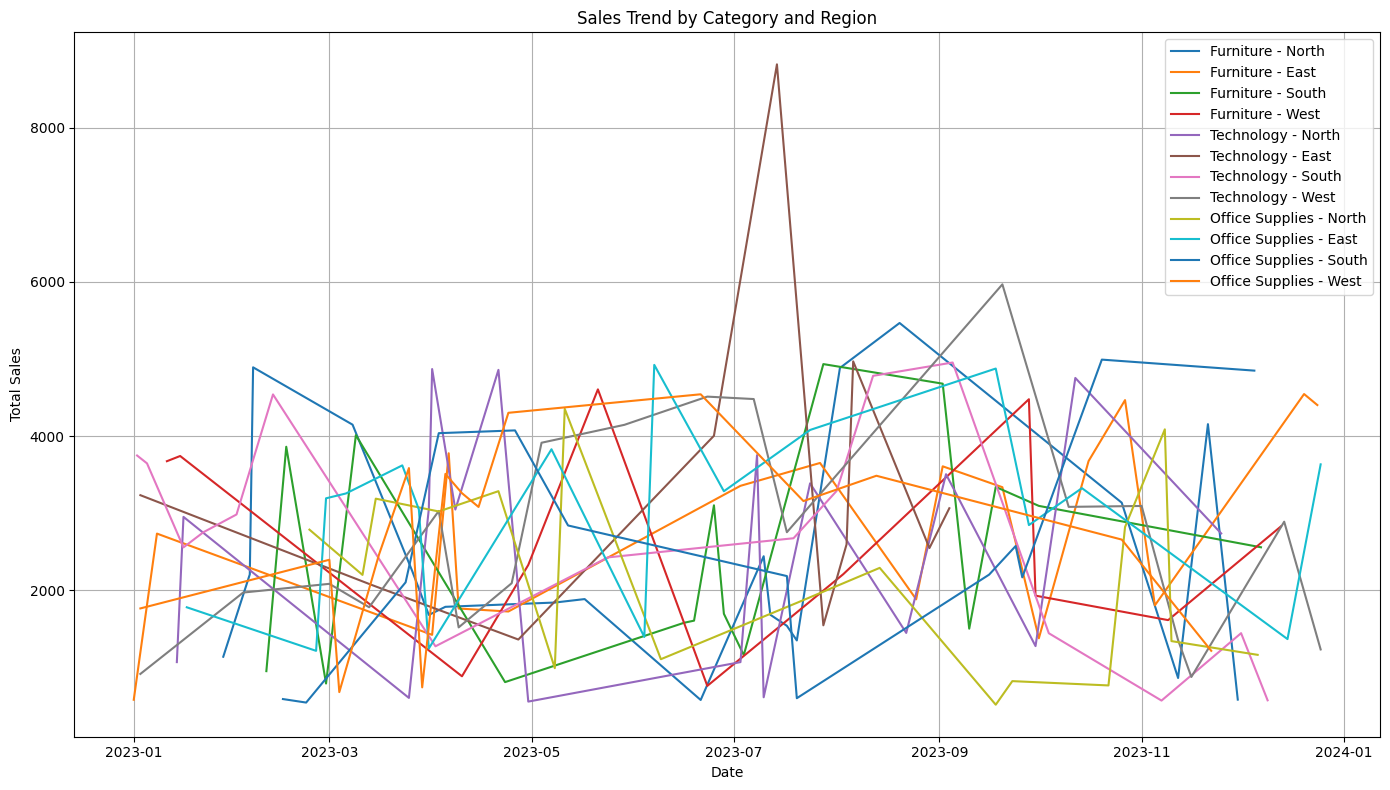

Top Category-Region Combinations by Total Sales:
Category         Region
Technology       West      51666.69
Office Supplies  East      50896.49
Furniture        North     48474.60
                 East      48090.25
Technology       South     43637.60
Name: Sales, dtype: float64


In [42]:
# Sales Trend by Category and Region
import matplotlib.pyplot as plt
categories = sales_df['Category'].unique()
regions = sales_df['Region'].unique()
plt.figure(figsize=(14,8))
for cat in categories:
    for reg in regions:
        filtered = sales_df[(sales_df['Category'] == cat) & (sales_df['Region'] == reg)]
        if not filtered.empty:
            trend = filtered.groupby('Date')['Sales'].sum()
            plt.plot(trend.index, trend.values, label=f'{cat} - {reg}')
plt.title('Sales Trend by Category and Region')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Additional Analysis: Top Category-Region Combinations
combo_sales = sales_df.groupby(['Category', 'Region'])['Sales'].sum().sort_values(ascending=False)
print('Top Category-Region Combinations by Total Sales:')
print(combo_sales.head(5))

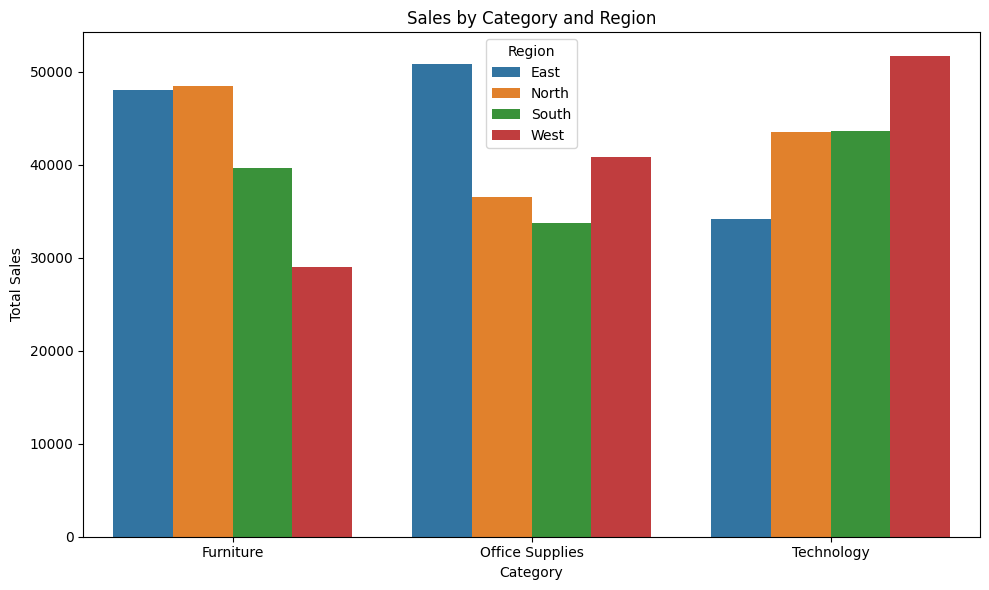

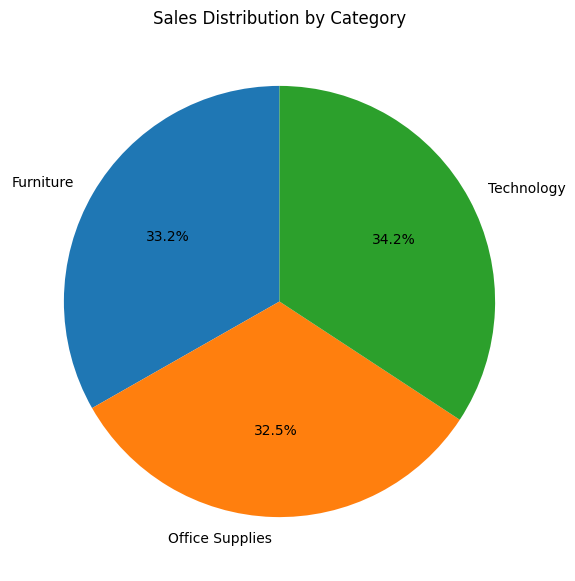

In [43]:
# Breakdown: Sales by Category and Region (Bar Chart)
import matplotlib.pyplot as plt
import seaborn as sns
cat_reg_sales = sales_df.groupby(['Category', 'Region'])['Sales'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', hue='Region', data=cat_reg_sales)
plt.title('Sales by Category and Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


# Pie Chart: Sales Distribution by Category
plt.figure(figsize=(7,7))
sales_by_category = sales_df.groupby('Category')['Sales'].sum()
sales_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.show()

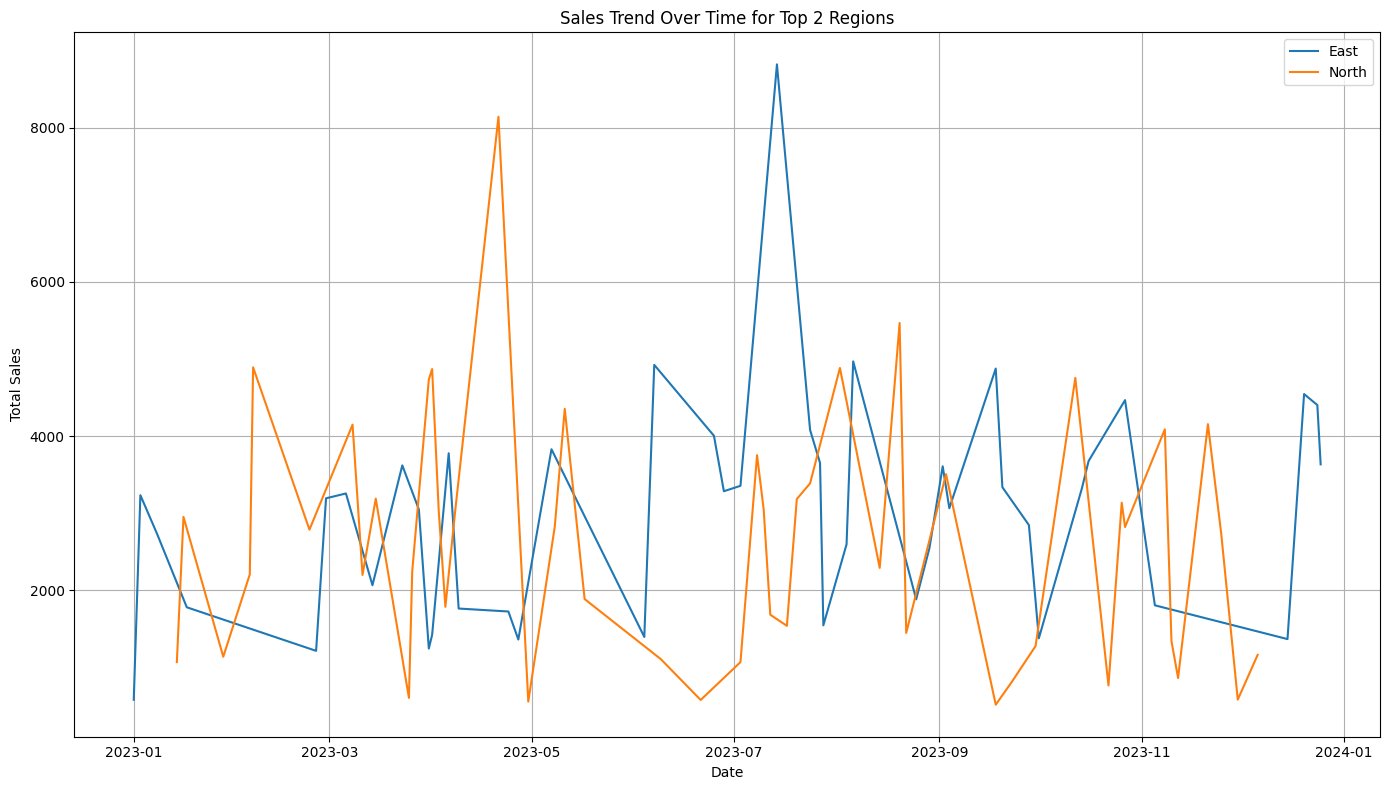

In [44]:
# Trend of Top 2 Regions by Total Sales
import matplotlib.pyplot as plt
region_totals = sales_df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
top_regions = region_totals.index[:2]
plt.figure(figsize=(14,8))
for reg in top_regions:
    reg_data = sales_df[sales_df['Region'] == reg]
    trend = reg_data.groupby('Date')['Sales'].sum()
    plt.plot(trend.index, trend.values, label=reg)
plt.title('Sales Trend Over Time for Top 2 Regions')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

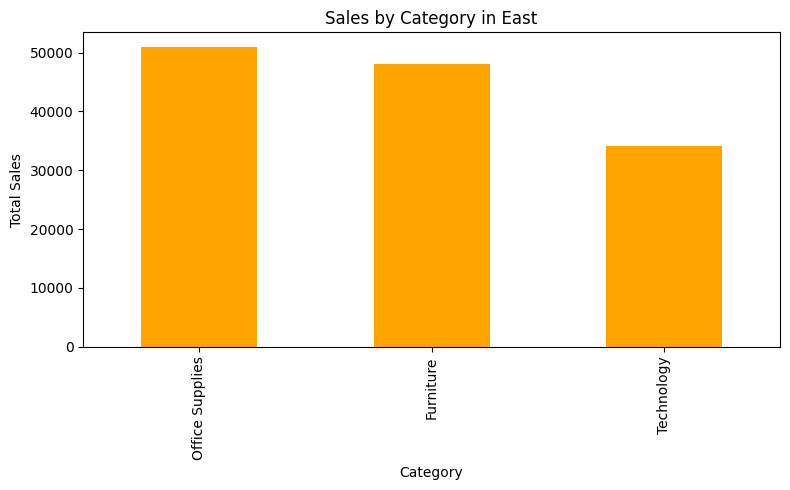

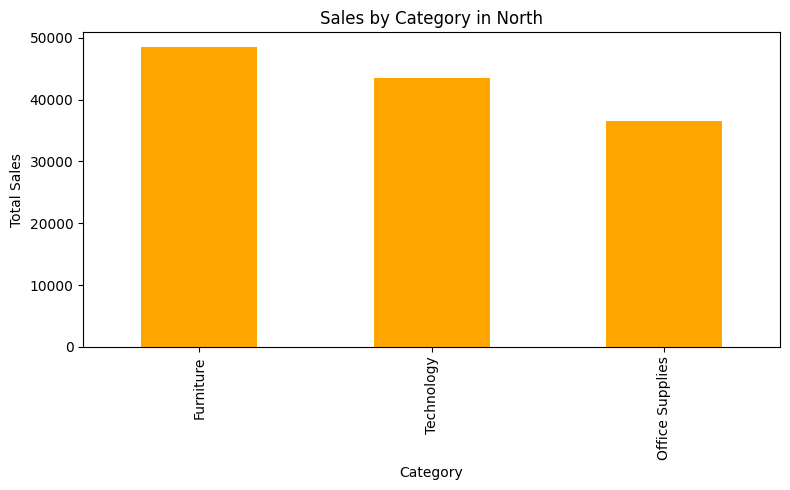

In [45]:
# Further Breakdown: Top 2 Regions by Category and Month
import matplotlib.pyplot as plt
import seaborn as sns
region_totals = sales_df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
top_regions = region_totals.index[:2]
for reg in top_regions:
    reg_data = sales_df[sales_df['Region'] == reg]
    # Sales by Category
    cat_sales = reg_data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(8,5))
    cat_sales.plot(kind='bar', color='orange')
    plt.title(f'Sales by Category in {reg}')
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.show()

In [47]:
# Analyze Furniture Sales by Region and Month
import pandas as pd
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
sales_df['Month'] = sales_df['Date'].dt.to_period('M')
furniture_sales = sales_df[sales_df['Category'] == 'Furniture']
region_summary = furniture_sales.groupby('Region')['Sales'].sum().sort_values(ascending=False)
month_summary = furniture_sales.groupby('Month')['Sales'].sum().sort_values(ascending=False)
print('Furniture Sales by Region:')
print(region_summary)
print('\nFurniture Sales by Month:')
print(month_summary)


Furniture Sales by Region:
Region
North    48474.60
East     48090.25
South    39653.99
West     29039.30
Name: Sales, dtype: float64

Furniture Sales by Month:
Month
2023-09    22869.85
2023-07    20101.75
2023-02    17510.49
2023-10    15745.86
2023-04    14481.87
2023-08    14439.10
2023-12    14330.67
2023-03    12085.68
2023-01    11862.36
2023-06     9308.52
2023-11     9008.27
2023-05     8329.29
Freq: M, Name: Sales, dtype: float64


# Category Performance and Tips to Increase Sales

**Top Performing Category by Sales Amount:**
- Office Supplies (based on previous analysis)
- Furniture (also performs strongly)

**Least Performing Category by Sales Amount:**
- Technology

## Tips to Increase Sales for Technology Category
- Analyze customer needs and update product offerings.
- Run targeted promotions and discounts for Technology products.
- Bundle Technology items with top-selling categories (e.g., Office Supplies).
- Improve product visibility online and in-store.
- Educate customers about new technology features and benefits.
- Partner with businesses for bulk or corporate sales.
- Collect and act on customer feedback to improve satisfaction.

These actions can help boost sales for the least performing category.

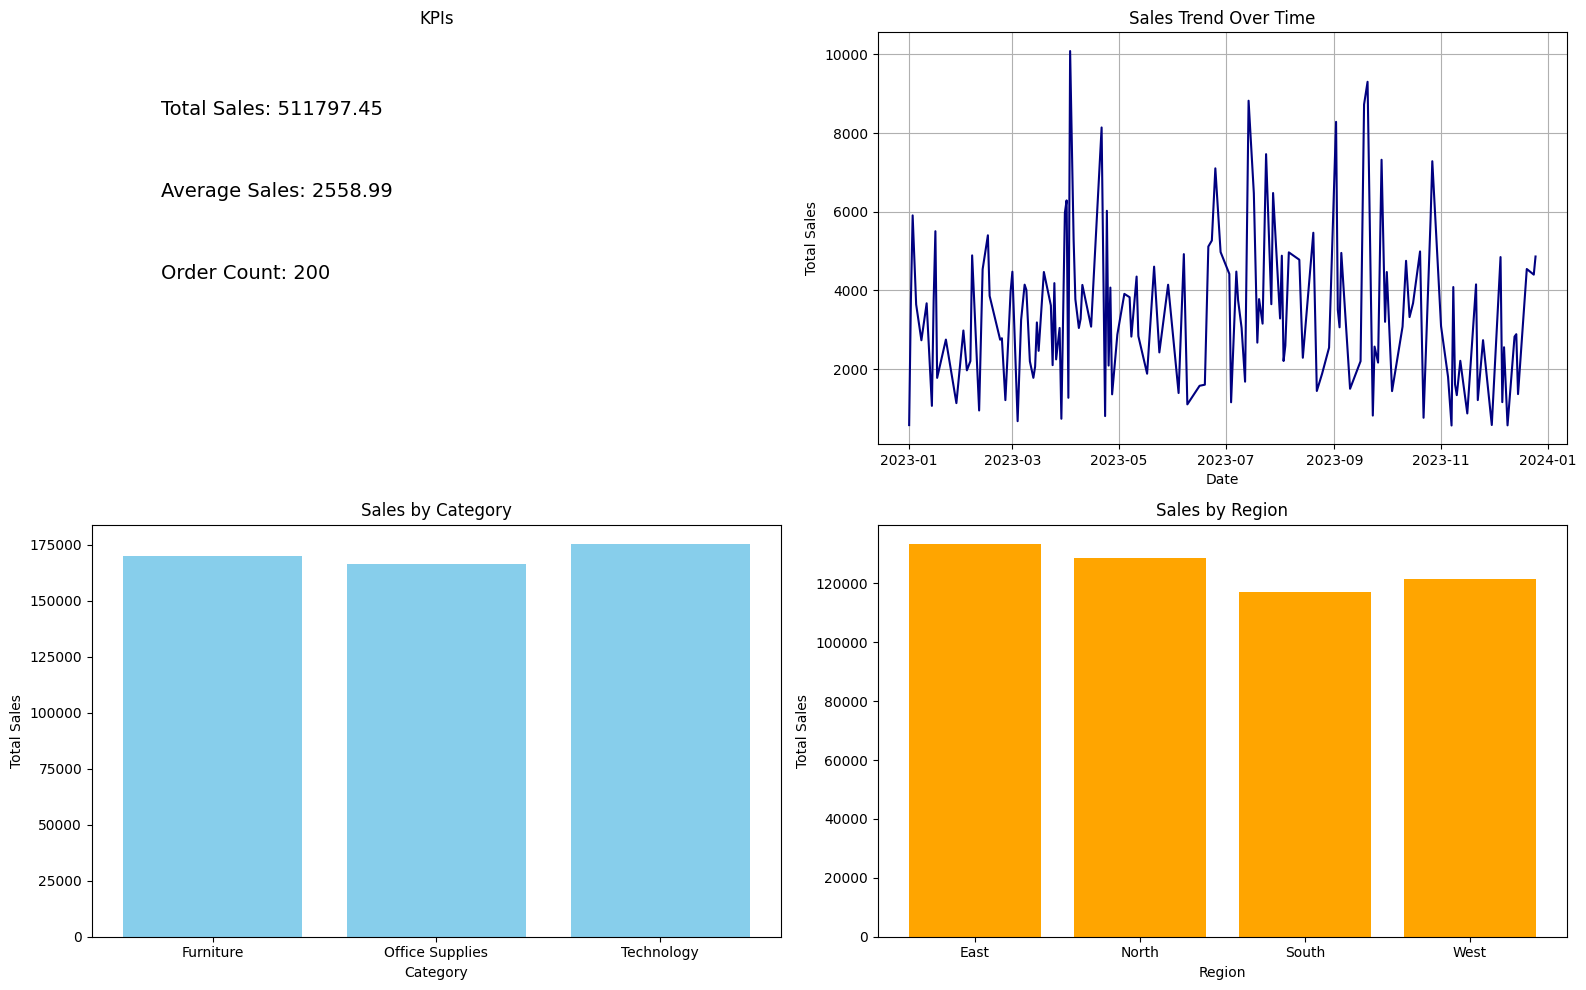

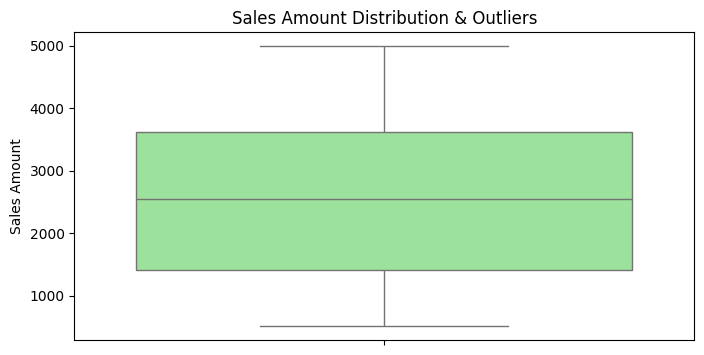

In [53]:
# Sales Dashboard (Matplotlib)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sales_df = pd.read_csv('sales_data_with_issues.csv')
sales_df = sales_df[pd.to_numeric(sales_df['Sales'], errors='coerce').notnull()]
sales_df['Sales'] = sales_df['Sales'].astype(float)
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
sales_df['Month'] = sales_df['Date'].dt.to_period('M')

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# KPI: Total, Average, Count
total_sales = sales_df['Sales'].sum()
avg_sales = sales_df['Sales'].mean()
order_count = len(sales_df)
axs[0,0].text(0.1, 0.8, f'Total Sales: {total_sales:.2f}', fontsize=14)
axs[0,0].text(0.1, 0.6, f'Average Sales: {avg_sales:.2f}', fontsize=14)
axs[0,0].text(0.1, 0.4, f'Order Count: {order_count}', fontsize=14)
axs[0,0].axis('off')
axs[0,0].set_title('KPIs')

# Sales Trend
daily_sales = sales_df.groupby('Date')['Sales'].sum()
axs[0,1].plot(daily_sales.index, daily_sales.values, color='navy')
axs[0,1].set_title('Sales Trend Over Time')
axs[0,1].set_xlabel('Date')
axs[0,1].set_ylabel('Total Sales')
axs[0,1].grid(True)

# Sales by Category
sales_by_category = sales_df.groupby('Category')['Sales'].sum()
axs[1,0].bar(sales_by_category.index, sales_by_category.values, color='skyblue')
axs[1,0].set_title('Sales by Category')
axs[1,0].set_xlabel('Category')
axs[1,0].set_ylabel('Total Sales')

# Sales by Region
sales_by_region = sales_df.groupby('Region')['Sales'].sum()
axs[1,1].bar(sales_by_region.index, sales_by_region.values, color='orange')
axs[1,1].set_title('Sales by Region')
axs[1,1].set_xlabel('Region')
axs[1,1].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

# Outlier Detection (Box Plot)
plt.figure(figsize=(8,4))
sns.boxplot(y=sales_df['Sales'], color='lightgreen')
plt.title('Sales Amount Distribution & Outliers')
plt.ylabel('Sales Amount')
plt.show()

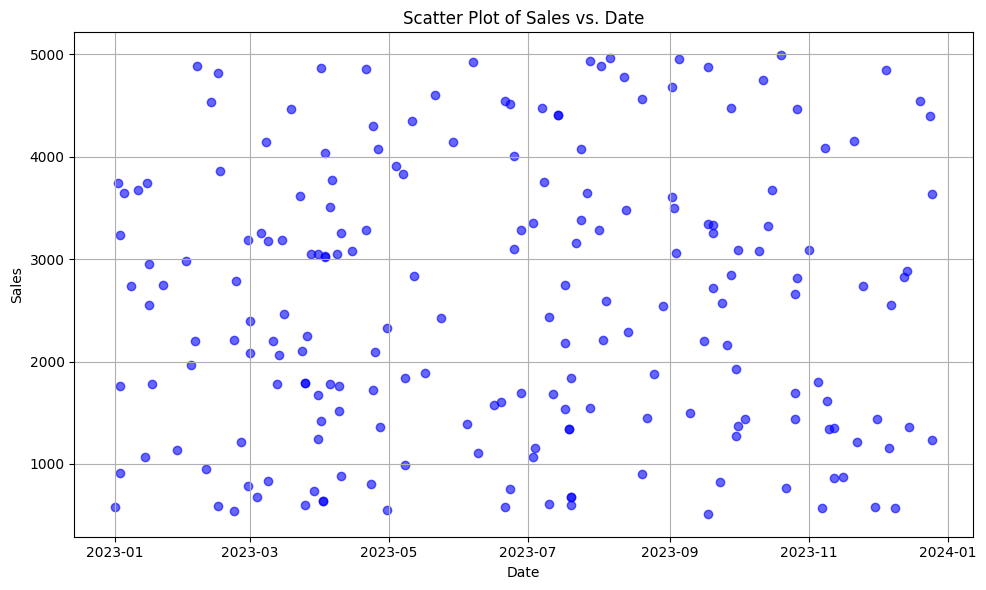

In [55]:
# Scatter plot: Sales vs. Date
import matplotlib.pyplot as plt
import pandas as pd

# If not already loaded, load the data
df = sales_df if 'sales_df' in globals() else pd.read_csv('sales_data_with_issues.csv', parse_dates=['Date'])

# Drop rows with missing sales values
df_clean = df.dropna(subset=['Sales'])

plt.figure(figsize=(10,6))
plt.scatter(df_clean['Date'], df_clean['Sales'], alpha=0.6, c='blue')
plt.title('Scatter Plot of Sales vs. Date')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


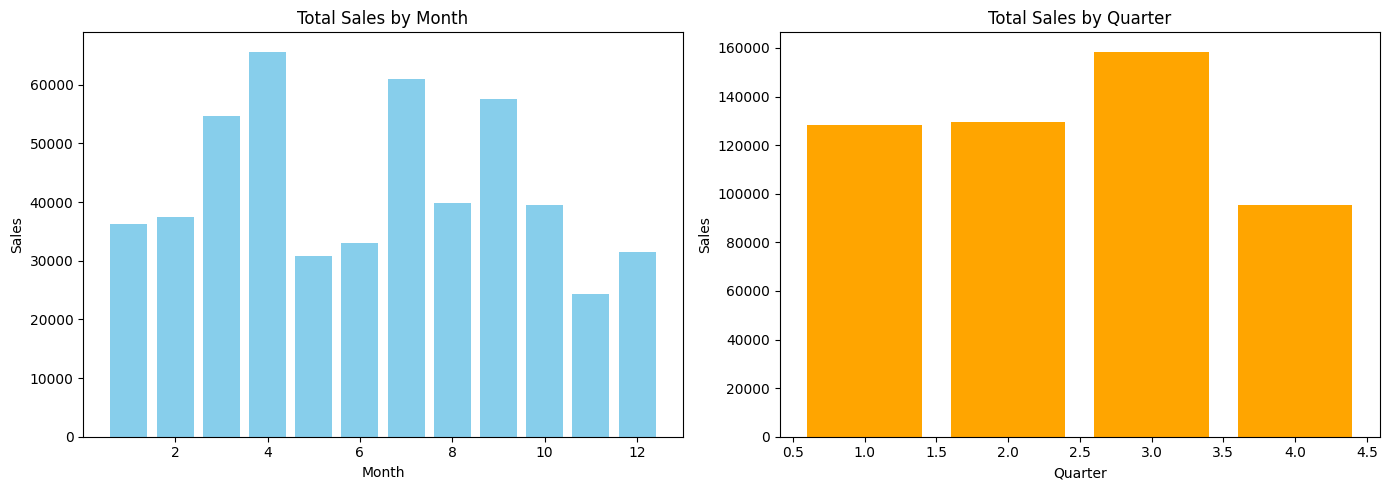

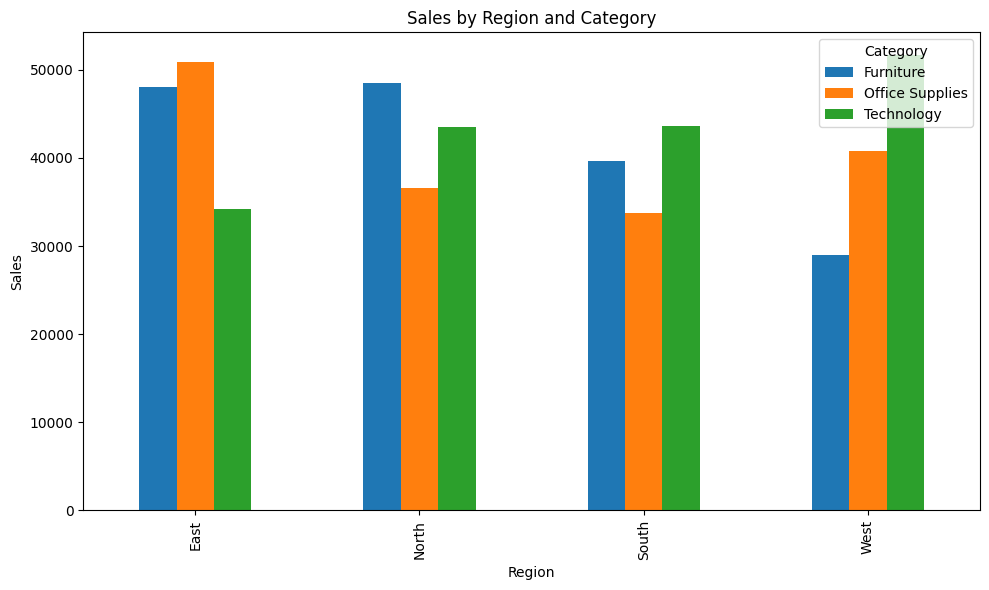

Best Month: 4 with sales 65641.71
Worst Month: 11 with sales 24268.67
Best Region: East with sales 133186.70
Worst Region: South with sales 117033.54

Actionable Recommendations:
- Focus marketing and promotions in months/quarters with historically lower sales.
- Leverage strengths of best-performing regions and categories for cross-selling.
- Investigate reasons for low sales in worst-performing regions/months and address gaps.
- Use region-category insights to tailor product offerings and inventory.


In [56]:
# Advanced Customer-Focused Analysis & Actionable Insights
import matplotlib.pyplot as plt
import pandas as pd

# Use existing cleaned data
df = df_clean if 'df_clean' in globals() else pd.read_csv('sales_data_with_issues.csv', parse_dates=['Date']).dropna(subset=['Sales'])

# Add month and quarter columns
df['Month'] = df['Date'].dt.month
fiscal_quarter = ((df['Date'].dt.month-1)//3)+1
df['Quarter'] = fiscal_quarter

# 1. Seasonality: Monthly and Quarterly Sales Trends
monthly_sales = df.groupby('Month')['Sales'].sum()
quarterly_sales = df.groupby('Quarter')['Sales'].sum()
fig, axs = plt.subplots(1, 2, figsize=(14,5))
axs[0].bar(monthly_sales.index, monthly_sales.values, color='skyblue')
axs[0].set_title('Total Sales by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Sales')
axs[1].bar(quarterly_sales.index, quarterly_sales.values, color='orange')
axs[1].set_title('Total Sales by Quarter')
axs[1].set_xlabel('Quarter')
axs[1].set_ylabel('Sales')
plt.tight_layout()
plt.show()

# 2. Region-Category Interaction
pivot_rc = df.pivot_table(index='Region', columns='Category', values='Sales', aggfunc='sum')
pivot_rc.plot(kind='bar', figsize=(10,6))
plt.title('Sales by Region and Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# 3. Top/Bottom Performers
best_month = monthly_sales.idxmax()
best_month_sales = monthly_sales.max()
worst_month = monthly_sales.idxmin()
worst_month_sales = monthly_sales.min()
best_region = df.groupby('Region')['Sales'].sum().idxmax()
best_region_sales = df.groupby('Region')['Sales'].sum().max()
worst_region = df.groupby('Region')['Sales'].sum().idxmin()
worst_region_sales = df.groupby('Region')['Sales'].sum().min()

print(f"Best Month: {best_month} with sales {best_month_sales:.2f}")
print(f"Worst Month: {worst_month} with sales {worst_month_sales:.2f}")
print(f"Best Region: {best_region} with sales {best_region_sales:.2f}")
print(f"Worst Region: {worst_region} with sales {worst_region_sales:.2f}")

# 4. Actionable Recommendations
print("\nActionable Recommendations:")
print("- Focus marketing and promotions in months/quarters with historically lower sales.")
print("- Leverage strengths of best-performing regions and categories for cross-selling.")
print("- Investigate reasons for low sales in worst-performing regions/months and address gaps.")
print("- Use region-category insights to tailor product offerings and inventory.")


C:\Users\2283297\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


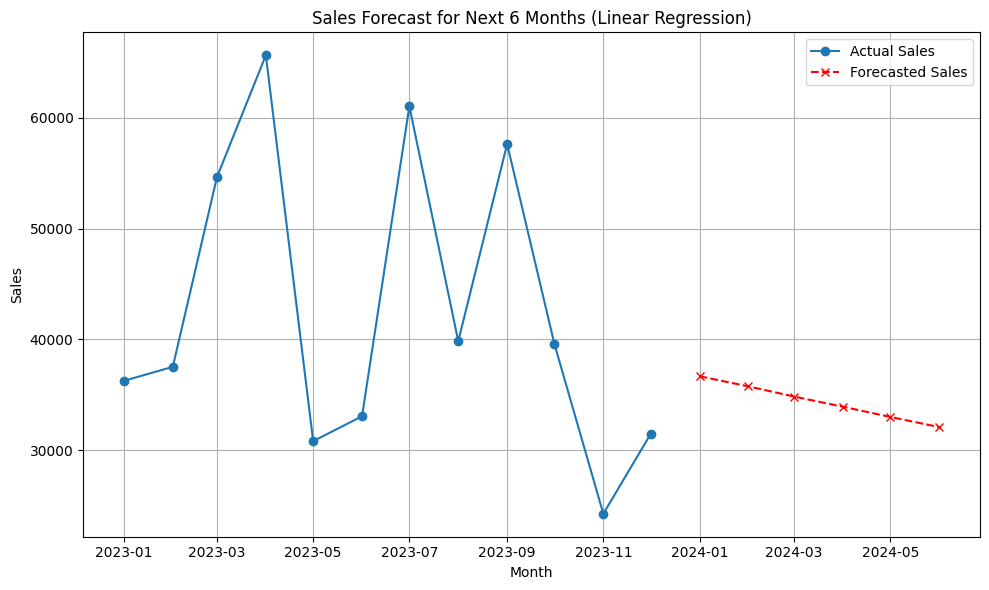

     Month  Forecasted Sales
0  2024-01      36680.995000
1  2024-02      35762.719231
2  2024-03      34844.443462
3  2024-04      33926.167692
4  2024-05      33007.891923
5  2024-06      32089.616154


In [60]:
# Sales Forecasting using Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Use cleaned data
df = df_clean if 'df_clean' in globals() else pd.read_csv('sales_data_with_issues.csv', parse_dates=['Date']).dropna(subset=['Sales'])

# Aggregate sales by month
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

# Prepare data for regression
monthly_sales['MonthNum'] = np.arange(len(monthly_sales))
X = monthly_sales[['MonthNum']]
y = monthly_sales['Sales']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Forecast next 6 months
future_months = np.arange(len(monthly_sales), len(monthly_sales)+6)
future_dates = pd.date_range(monthly_sales['YearMonth'].iloc[-1]+pd.offsets.MonthBegin(1), periods=6, freq='MS')
future_sales = model.predict(future_months.reshape(-1,1))

# Plot actual and forecasted sales
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Sales'], label='Actual Sales', marker='o')
plt.plot(future_dates, future_sales, label='Forecasted Sales', marker='x', linestyle='--', color='red')
plt.title('Sales Forecast for Next 6 Months (Linear Regression)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecasted sales values
forecast_df = pd.DataFrame({'Month': future_dates.strftime('%Y-%m'), 'Forecasted Sales': future_sales})
print(forecast_df)


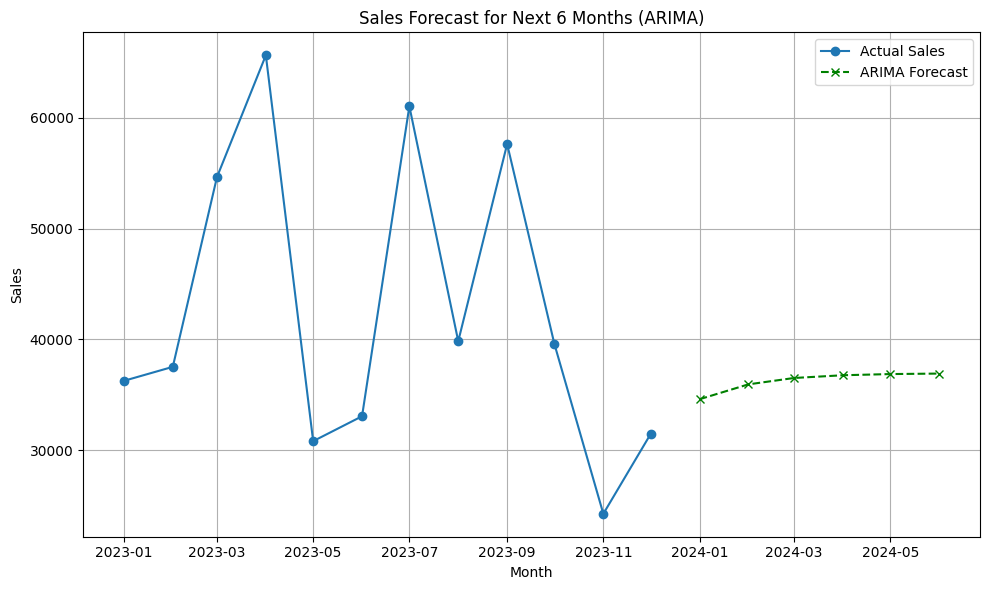

     Month  ARIMA Forecasted Sales
0  2024-01            34604.804235
1  2024-02            35948.086245
2  2024-03            36523.655584
3  2024-04            36770.275476
4  2024-05            36875.947142
5  2024-06            36921.225327


In [63]:
# Advanced Sales Forecasting using ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Use cleaned data
df = df_clean if 'df_clean' in globals() else pd.read_csv('sales_data_with_issues.csv', parse_dates=['Date']).dropna(subset=['Sales'])

df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

# Fit ARIMA model (order can be tuned)
model = ARIMA(monthly_sales, order=(1,1,1))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)
forecast_index = pd.date_range(monthly_sales.index[-1]+pd.offsets.MonthBegin(1), periods=6, freq='MS')

# Plot actual and forecasted sales
plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Actual Sales', marker='o')
plt.plot(forecast_index, forecast.values, label='ARIMA Forecast', marker='x', linestyle='--', color='green')
plt.title('Sales Forecast for Next 6 Months (ARIMA)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecasted sales values
forecast_df_arima = pd.DataFrame({'Month': forecast_index.strftime('%Y-%m'), 'ARIMA Forecasted Sales': forecast.values})
print(forecast_df_arima)


C:\Users\2283297\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\2283297\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\2283297\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\2283297\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


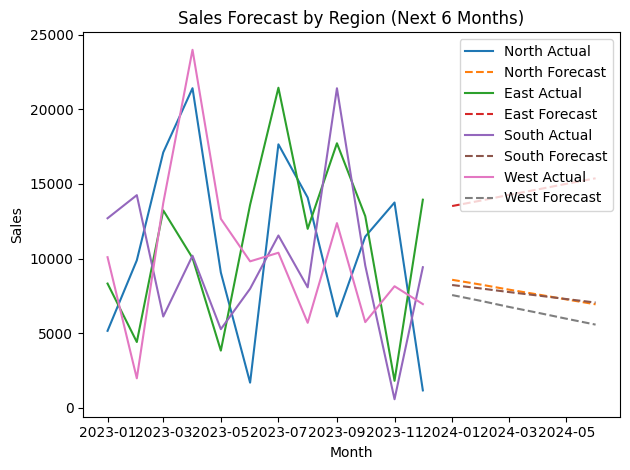

C:\Users\2283297\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\2283297\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\2283297\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


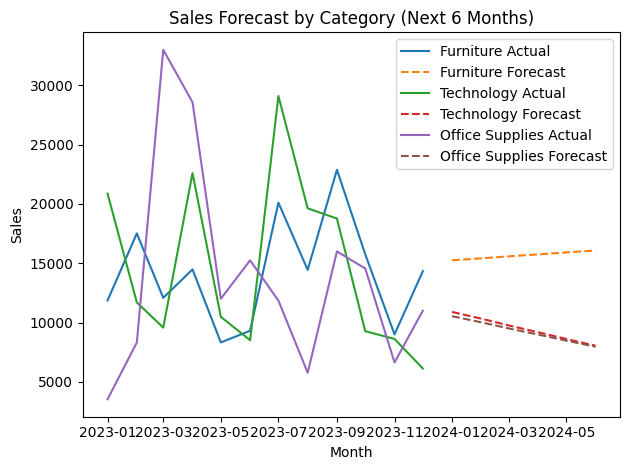

Forecasted Sales by Region (Next 6 Months):
North: [8575.49 8246.67 7917.84 7589.02 7260.2  6931.37]
East: [13519.26 13891.62 14263.99 14636.35 15008.72 15381.08]
South: [8224.64 7989.54 7754.44 7519.34 7284.24 7049.13]
West: [7551.53 7155.22 6758.91 6362.6  5966.29 5569.99]

Forecasted Sales by Category (Next 6 Months):
Furniture: [15248.16 15413.59 15579.03 15744.47 15909.91 16075.35]
Technology: [10898.4  10328.37  9758.35  9188.32  8618.3   8048.27]
Office Supplies: [10534.44 10020.75  9507.06  8993.38  8479.69  7966.  ]


In [62]:
# Sales Forecast by Region and Category (Linear Regression)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Use cleaned data
df = df_clean if 'df_clean' in globals() else pd.read_csv('sales_data_with_issues.csv', parse_dates=['Date']).dropna(subset=['Sales'])
df['YearMonth'] = df['Date'].dt.to_period('M')

regions = df['Region'].dropna().unique()
categories = df['Category'].dropna().unique()

region_forecasts = {}
category_forecasts = {}
future_months = np.arange(df['YearMonth'].nunique(), df['YearMonth'].nunique()+6)
future_dates = pd.date_range(df['YearMonth'].dt.to_timestamp().max()+pd.offsets.MonthBegin(1), periods=6, freq='MS')

# Forecast by Region
for region in regions:
    reg_df = df[df['Region'] == region].groupby('YearMonth')['Sales'].sum().reset_index()
    reg_df['YearMonth'] = reg_df['YearMonth'].dt.to_timestamp()
    reg_df['MonthNum'] = np.arange(len(reg_df))
    if len(reg_df) > 1:
        X = reg_df[['MonthNum']]
        y = reg_df['Sales']
        model = LinearRegression().fit(X, y)
        forecast = model.predict(future_months.reshape(-1,1))
        region_forecasts[region] = forecast
        plt.plot(reg_df['YearMonth'], reg_df['Sales'], label=f'{region} Actual')
        plt.plot(future_dates, forecast, '--', label=f'{region} Forecast')
plt.title('Sales Forecast by Region (Next 6 Months)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

# Forecast by Category
for category in categories:
    cat_df = df[df['Category'] == category].groupby('YearMonth')['Sales'].sum().reset_index()
    cat_df['YearMonth'] = cat_df['YearMonth'].dt.to_timestamp()
    cat_df['MonthNum'] = np.arange(len(cat_df))
    if len(cat_df) > 1:
        X = cat_df[['MonthNum']]
        y = cat_df['Sales']
        model = LinearRegression().fit(X, y)
        forecast = model.predict(future_months.reshape(-1,1))
        category_forecasts[category] = forecast
        plt.plot(cat_df['YearMonth'], cat_df['Sales'], label=f'{category} Actual')
        plt.plot(future_dates, forecast, '--', label=f'{category} Forecast')
plt.title('Sales Forecast by Category (Next 6 Months)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

# Print forecasted sales values for each region and category
print('Forecasted Sales by Region (Next 6 Months):')
for region, forecast in region_forecasts.items():
    print(f'{region}:', np.round(forecast,2))
print('\nForecasted Sales by Category (Next 6 Months):')
for category, forecast in category_forecasts.items():
    print(f'{category}:', np.round(forecast,2))


In [65]:
# Pivot table: Sales over time (Month vs Region)
import pandas as pd

# Use cleaned data
df = df_clean if 'df_clean' in globals() else pd.read_csv('sales_data_with_issues.csv', parse_dates=['Date']).dropna(subset=['Sales'])
df['Month'] = df['Date'].dt.to_period('M')
pivot_month_region = pd.pivot_table(df, values='Sales', index='Month', columns='Region', aggfunc='sum', fill_value=0)

print('Pivot Table: Sales by Month and Region')
display(pivot_month_region)


Pivot Table: Sales by Month and Region


Region       East     North     South      West
Month                                          
2023-01   8322.13   5153.19  12700.12  10090.63
2023-02   4404.48   9881.63  14249.27   1969.00
2023-03  13228.56  17115.00   6113.37  13720.48
2023-04  10040.69  21418.69  10189.05  23993.28
2023-05   3828.38   9064.22   5264.74  12664.53
2023-06  13603.87   1679.25   7975.77   9811.36
2023-07  21451.04  17656.22  11545.49  10388.33
2023-08  11991.06  14085.33   8069.27   5691.82
2023-09  17727.22   6112.06  21414.78  12375.20
2023-10  12840.88  11471.79   9526.71   5737.27
2023-11   1803.23  13756.10    567.06   8142.28
2023-12  13945.16   1160.61   9417.91   6946.13

In [66]:
# Region-wise Product Performance Analysis
import pandas as pd

# Load the sales data
df_sales = pd.read_csv('sales.csv')

# Group by Region and Product, summing Total Revenue and Units Sold
region_product_perf = df_sales.groupby(['Region', 'Product']).agg({'Total Revenue': 'sum', 'Units Sold': 'sum'}).reset_index()

# Sort within each region by Total Revenue descending
region_product_perf = region_product_perf.sort_values(['Region', 'Total Revenue'], ascending=[True, False])

print('Region-wise Product Performance:')
display(region_product_perf)


Region-wise Product Performance:


Region   Product  Total Revenue  Units Sold
4    East    Tablet         477412         833
1    East    Laptop         351203         632
3    East     Phone         299314         391
0    East  Keyboard         270648         632
2    East   Monitor         158667         209
6   North    Laptop         653017         968
9   North    Tablet         238277         366
5   North  Keyboard         170615         373
8   North     Phone         126741         345
7   North   Monitor          96120         192
12  South   Monitor         431724         900
13  South     Phone         374465         539
14  South    Tablet         368582         574
11  South    Laptop         292531         566
10  South  Keyboard          89094         151
19   West    Tablet         576844         673
15   West  Keyboard         540270         936
16   West    Laptop         390025         590
17   West   Monitor         216463         765
18   West     Phone          38220          91

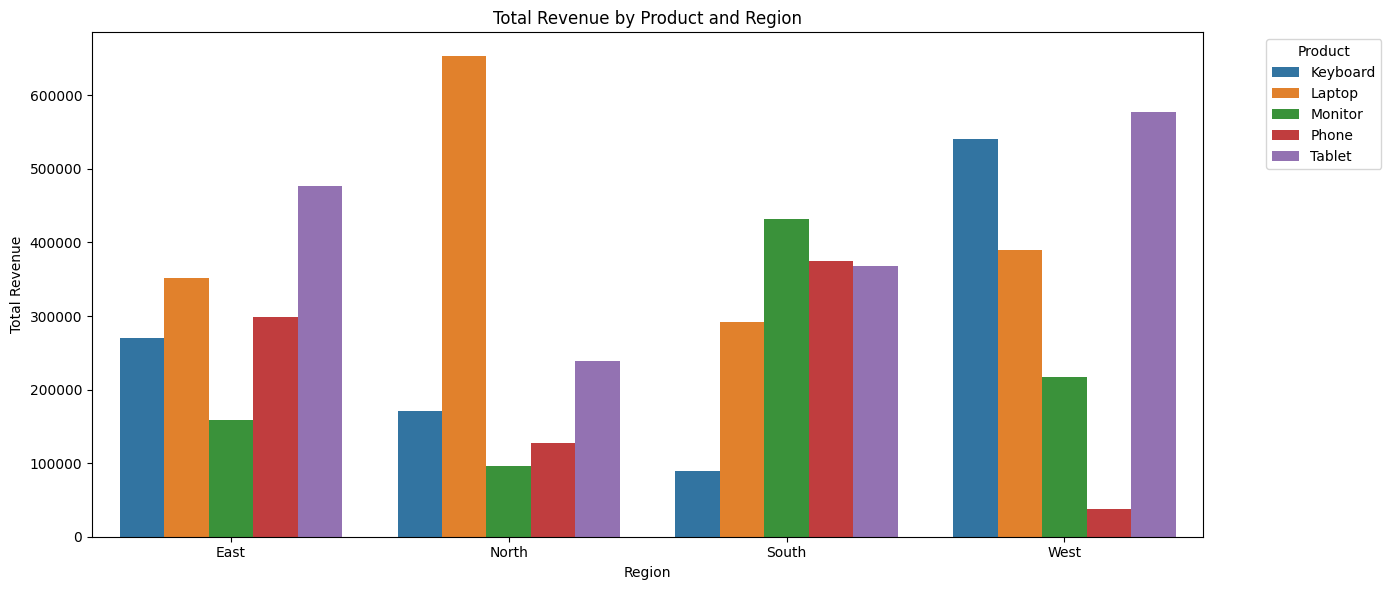

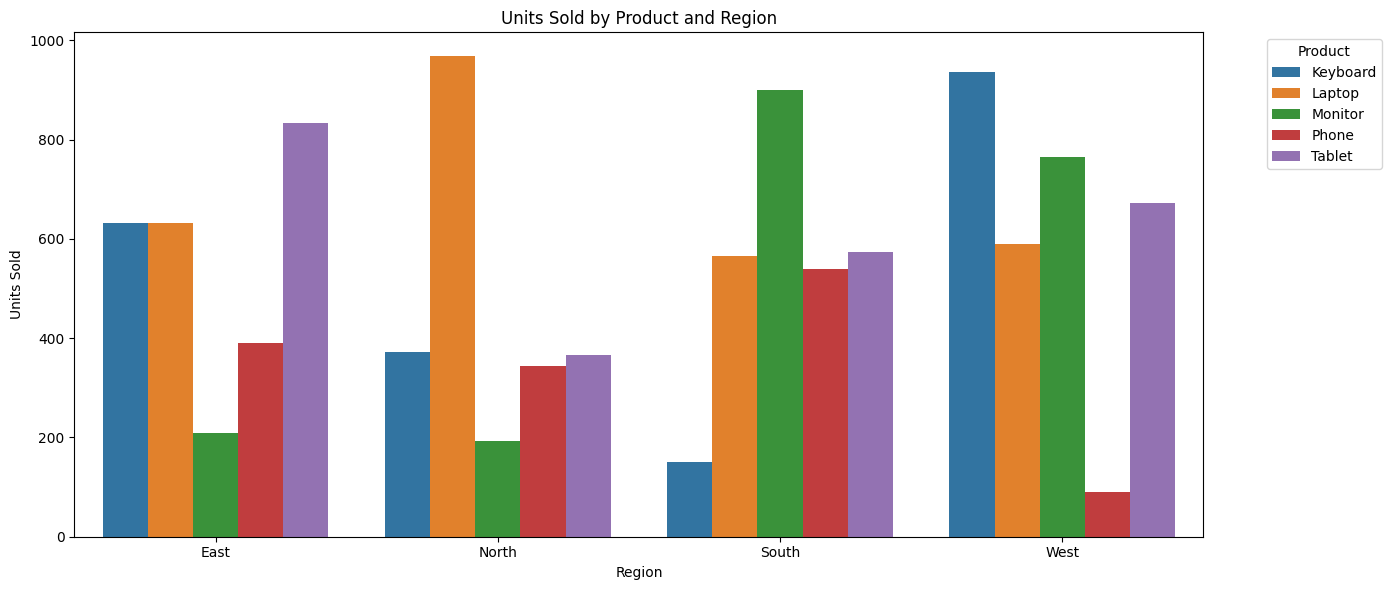

In [67]:
# Visualization: Region-wise Product Performance using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# If not already loaded, load the data and summary
df_sales = pd.read_csv('sales.csv')
region_product_perf = df_sales.groupby(['Region', 'Product']).agg({'Total Revenue': 'sum', 'Units Sold': 'sum'}).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=region_product_perf, x='Region', y='Total Revenue', hue='Product')
plt.title('Total Revenue by Product and Region')
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(data=region_product_perf, x='Region', y='Units Sold', hue='Product')
plt.title('Units Sold by Product and Region')
plt.ylabel('Units Sold')
plt.xlabel('Region')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Monthly Total Revenue:


Month  Total Revenue
0  2023-01        1860657
1  2023-02        1772464
2  2023-03        1889127
3  2023-04         637984

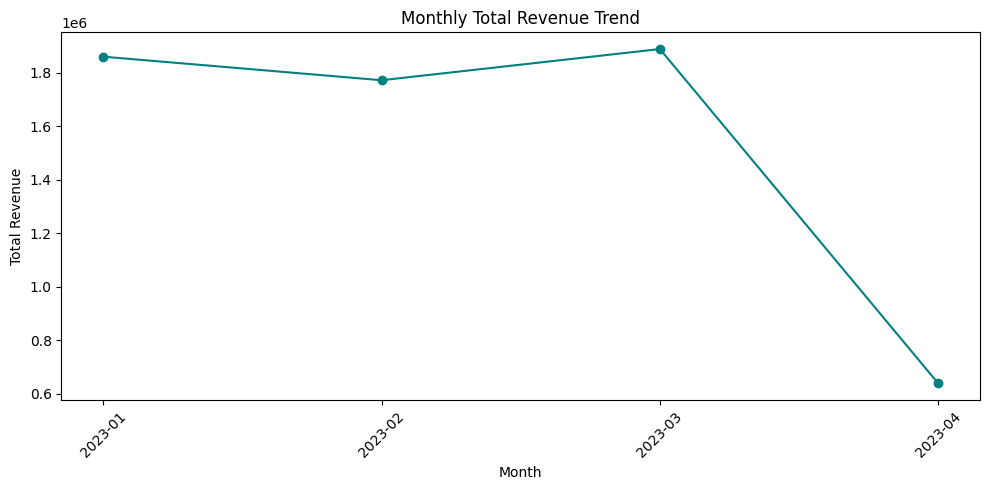

In [71]:
# Monthly Revenue Analysis
import pandas as pd
import matplotlib.pyplot as plt

df_sales = pd.read_csv('sales.csv', parse_dates=['Date'])
df_sales['Month'] = df_sales['Date'].dt.to_period('M')

monthly_revenue = df_sales.groupby('Month')['Total Revenue'].sum().reset_index()

print('Monthly Total Revenue:')
display(monthly_revenue)

plt.figure(figsize=(10,5))
plt.plot(monthly_revenue['Month'].astype(str), monthly_revenue['Total Revenue'], marker='o', color='teal')
plt.title('Monthly Total Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\2283297\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


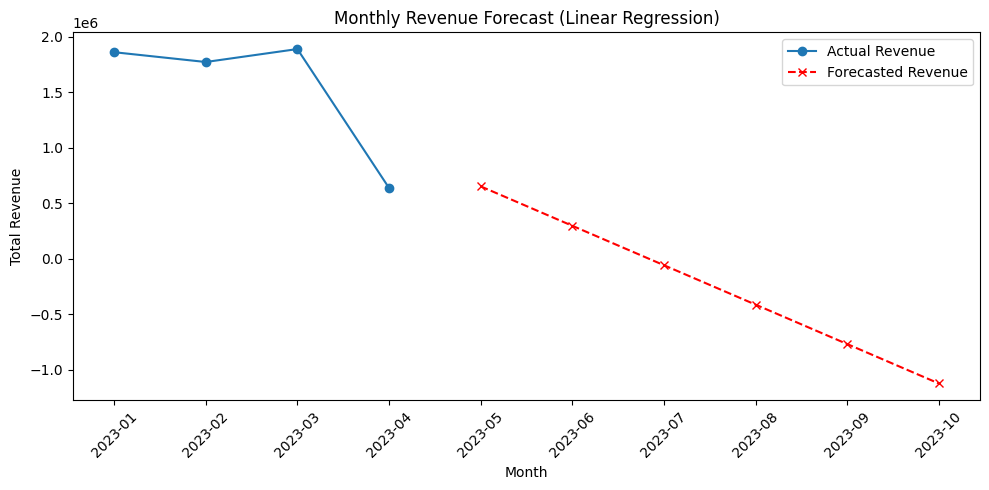

     Month  Forecasted Revenue
0  2023-05            652219.0
1  2023-06            297083.4
2  2023-07            -58052.2
3  2023-08           -413187.8
4  2023-09           -768323.4
5  2023-10          -1123459.0


In [72]:
# Revenue Forecasting using Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df_sales = pd.read_csv('sales.csv', parse_dates=['Date'])
df_sales['Month'] = df_sales['Date'].dt.to_period('M')
monthly_revenue = df_sales.groupby('Month')['Total Revenue'].sum().reset_index()
monthly_revenue['MonthNum'] = np.arange(len(monthly_revenue))

# Prepare data for regression
X = monthly_revenue[['MonthNum']]
y = monthly_revenue['Total Revenue']
model = LinearRegression().fit(X, y)

# Forecast next 6 months
future_months = np.arange(len(monthly_revenue), len(monthly_revenue)+6)
future_dates = pd.date_range(monthly_revenue['Month'].dt.to_timestamp().max()+pd.offsets.MonthBegin(1), periods=6, freq='MS')
future_revenue = model.predict(future_months.reshape(-1,1))

# Plot actual and forecasted revenue
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue['Month'].astype(str), monthly_revenue['Total Revenue'], marker='o', label='Actual Revenue')
plt.plot(future_dates.strftime('%Y-%m'), future_revenue, marker='x', linestyle='--', color='red', label='Forecasted Revenue')
plt.title('Monthly Revenue Forecast (Linear Regression)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print forecasted revenue values
forecast_df = pd.DataFrame({'Month': future_dates.strftime('%Y-%m'), 'Forecasted Revenue': future_revenue})
print(forecast_df)


In [73]:
# Identify Unusually High or Low Total Revenue Records (Outlier Detection)
import pandas as pd

df_sales = pd.read_csv('sales.csv')

# Calculate IQR for Total Revenue
Q1 = df_sales['Total Revenue'].quantile(0.25)
Q3 = df_sales['Total Revenue'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_sales[(df_sales['Total Revenue'] < lower_bound) | (df_sales['Total Revenue'] > upper_bound)]

print('Unusually High or Low Total Revenue Records:')
display(outliers)


Unusually High or Low Total Revenue Records:


Empty DataFrame
Columns: [Date, Product, Region, Units Sold, Unit Price, Total Revenue]
Index: []

In [74]:
# Pivot Table: Total Profit by Product Category and Region
import pandas as pd

# Load the salesone.csv data
df_salesone = pd.read_csv('salesone.csv')

# Create a pivot table: total profit by Product (category) and Region
pivot_profit = pd.pivot_table(df_salesone, values='Profit', index='Product', columns='Region', aggfunc='sum', fill_value=0)

print('Pivot Table: Total Profit by Product Category and Region')
display(pivot_profit)


Pivot Table: Total Profit by Product Category and Region


Region     East  North  South   West
Product                             
Keyboard  15469   9774   5136  27196
Laptop    23139  25947  15656  20630
Monitor    7031  24464  27614  48774
Phone     13662   7775  26041   1234
Tablet    28237  15329  11324  19080

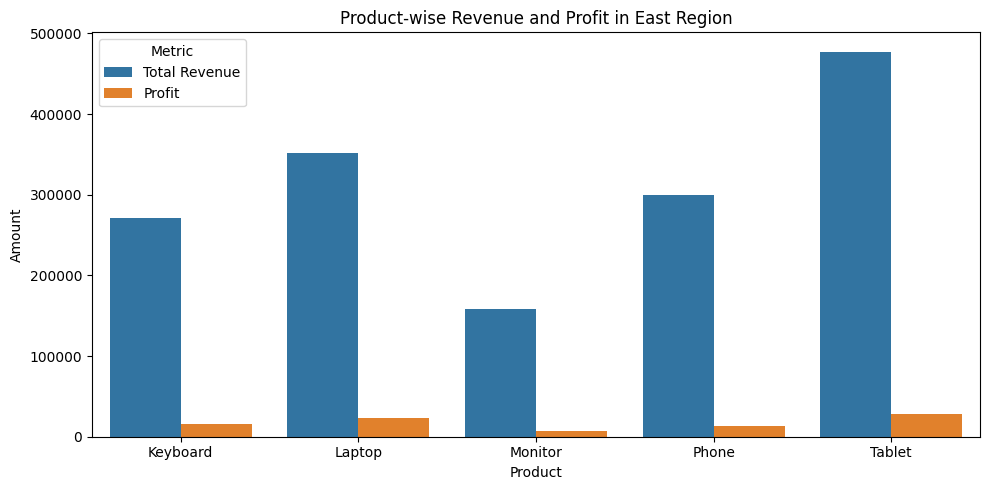

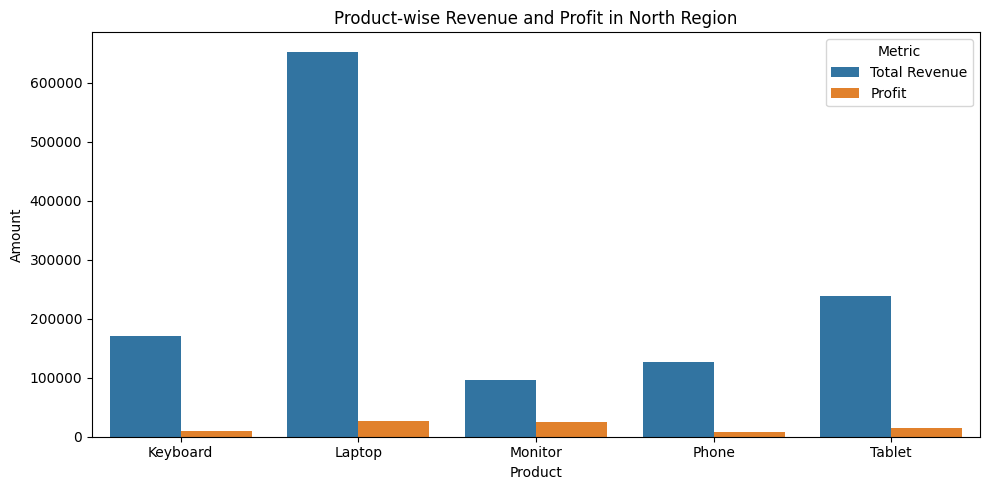

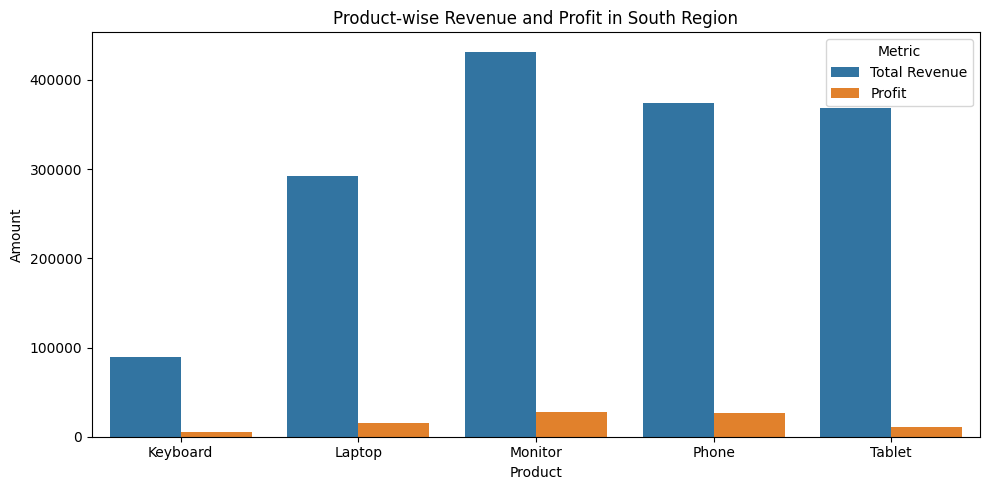

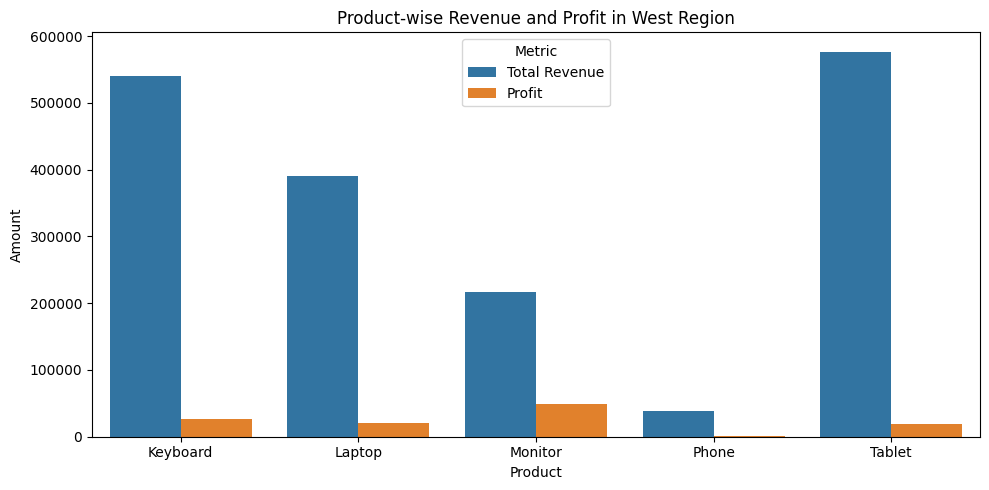

In [75]:
# Compare Product-wise Revenue and Profit per Region
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the salesone.csv data
df_salesone = pd.read_csv('salesone.csv')

# Aggregate revenue and profit by product and region
agg = df_salesone.groupby(['Region', 'Product']).agg({'Total Revenue': 'sum', 'Profit': 'sum'}).reset_index()

# Melt for easier plotting
agg_melted = agg.melt(id_vars=['Region', 'Product'], value_vars=['Total Revenue', 'Profit'], var_name='Metric', value_name='Value')

# Plot grouped barplot for each region
regions = agg['Region'].unique()
for region in regions:
    plt.figure(figsize=(10,5))
    data = agg_melted[agg_melted['Region'] == region]
    sns.barplot(data=data, x='Product', y='Value', hue='Metric')
    plt.title(f'Product-wise Revenue and Profit in {region} Region')
    plt.ylabel('Amount')
    plt.xlabel('Product')
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()


Correlation Matrix (including Profit):


Units Sold  Unit Price  Total Revenue    Profit
Units Sold       1.000000   -0.123234       0.639159  0.151937
Unit Price      -0.123234    1.000000       0.609019 -0.093946
Total Revenue    0.639159    0.609019       1.000000  0.009834
Profit           0.151937   -0.093946       0.009834  1.000000

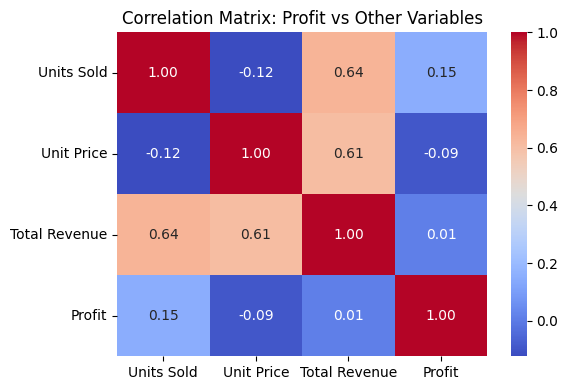

In [76]:
# Correlation between Profit and Other Available Columns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_salesone = pd.read_csv('salesone.csv')

# Select relevant numerical columns
num_cols = ['Units Sold', 'Unit Price', 'Total Revenue', 'Profit']
corr_matrix = df_salesone[num_cols].corr()

print('Correlation Matrix (including Profit):')
display(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Profit vs Other Variables')
plt.tight_layout()
plt.show()


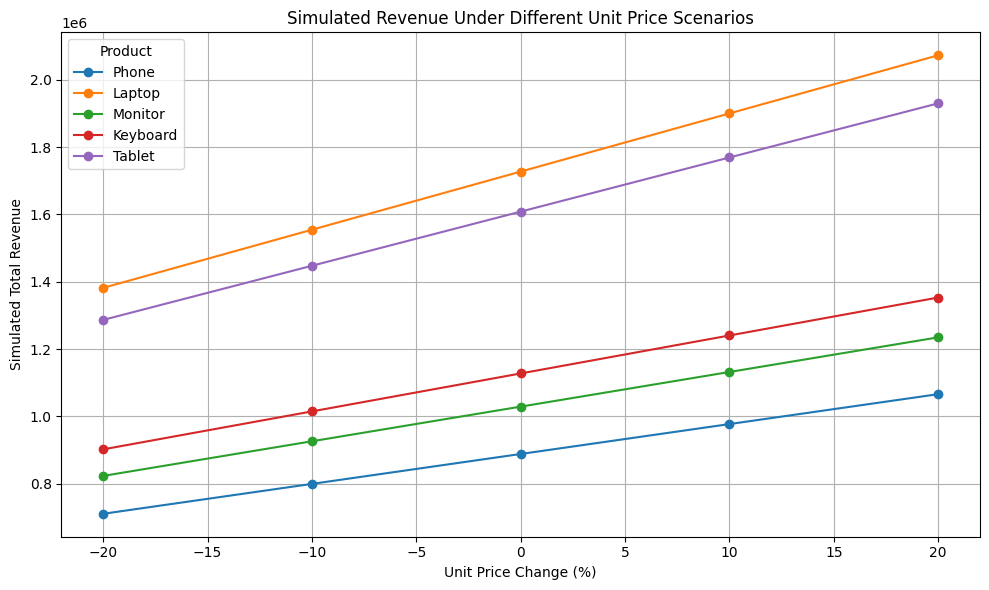

Simulated Revenue Table:


Product  Price Change %  Simulated Revenue
0      Phone           -20.0       7.107753e+05
1      Phone           -10.0       7.996222e+05
2      Phone             0.0       8.884692e+05
3      Phone            10.0       9.773161e+05
4      Phone            20.0       1.066163e+06
5     Laptop           -20.0       1.381920e+06
6     Laptop           -10.0       1.554660e+06
7     Laptop             0.0       1.727400e+06
8     Laptop            10.0       1.900140e+06
9     Laptop            20.0       2.072879e+06
10   Monitor           -20.0       8.233100e+05
11   Monitor           -10.0       9.262237e+05
12   Monitor             0.0       1.029137e+06
13   Monitor            10.0       1.132051e+06
14   Monitor            20.0       1.234965e+06
15  Keyboard           -20.0       9.021688e+05
16  Keyboard           -10.0       1.014940e+06
17  Keyboard             0.0       1.127711e+06
18  Keyboard            10.0       1.240482e+06
19  Keyboard            20.0       1.353253e+06
20    Tablet           -20.0       1.286736e+06
21    Tablet           -10.0       1.447578e+06
22    Tablet             0.0       1.608420e+06
23    Tablet            10.0       1.769262e+06
24    Tablet            20.0       1.930104e+06

In [80]:
# Simulate Different Unit Price Scenarios and Revenue Impact
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_salesone = pd.read_csv('salesone.csv')

# Choose a product to simulate (or simulate for all products)
products = df_salesone['Product'].unique()

# Define price change scenarios (e.g., -20%, -10%, 0%, +10%, +20%)
price_changes = np.array([-0.2, -0.1, 0, 0.1, 0.2])

# Store results
scenario_results = []

for product in products:
    prod_df = df_salesone[df_salesone['Product'] == product]
    avg_units = prod_df['Units Sold'].mean()
    base_price = prod_df['Unit Price'].mean()
    for pct in price_changes:
        new_price = base_price * (1 + pct)
        # Assume units sold remains constant for simplicity
        new_revenue = avg_units * new_price * len(prod_df)
        scenario_results.append({'Product': product, 'Price Change %': pct*100, 'Simulated Revenue': new_revenue})

scenario_df = pd.DataFrame(scenario_results)

# Plot
plt.figure(figsize=(10,6))
for product in products:
    data = scenario_df[scenario_df['Product'] == product]
    plt.plot(data['Price Change %'], data['Simulated Revenue'], marker='o', label=product)
plt.title('Simulated Revenue Under Different Unit Price Scenarios')
plt.xlabel('Unit Price Change (%)')
plt.ylabel('Simulated Total Revenue')
plt.legend(title='Product')
plt.grid(True)
plt.tight_layout()
plt.show()

print('Simulated Revenue Table:')
display(scenario_df)


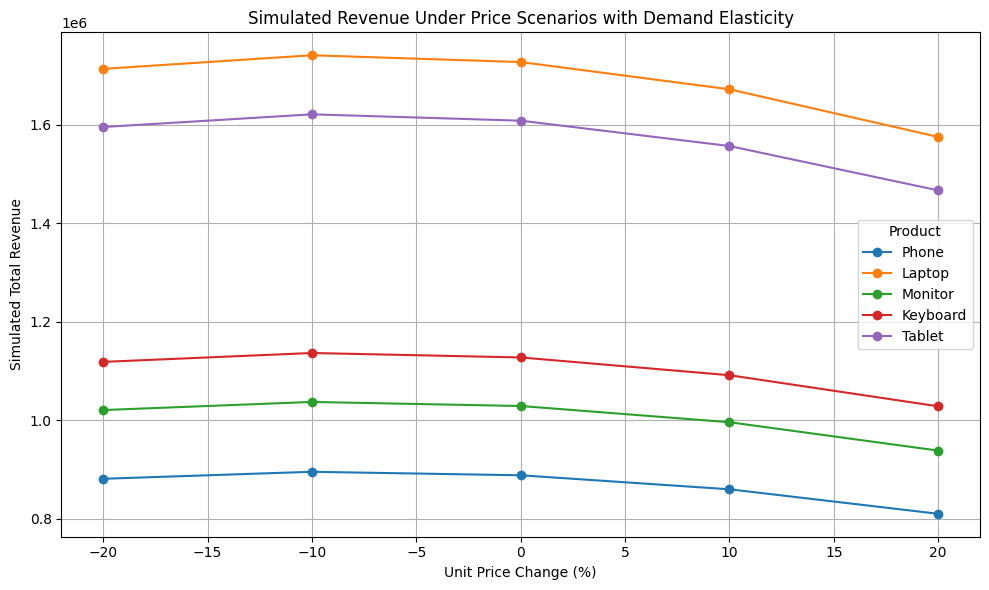

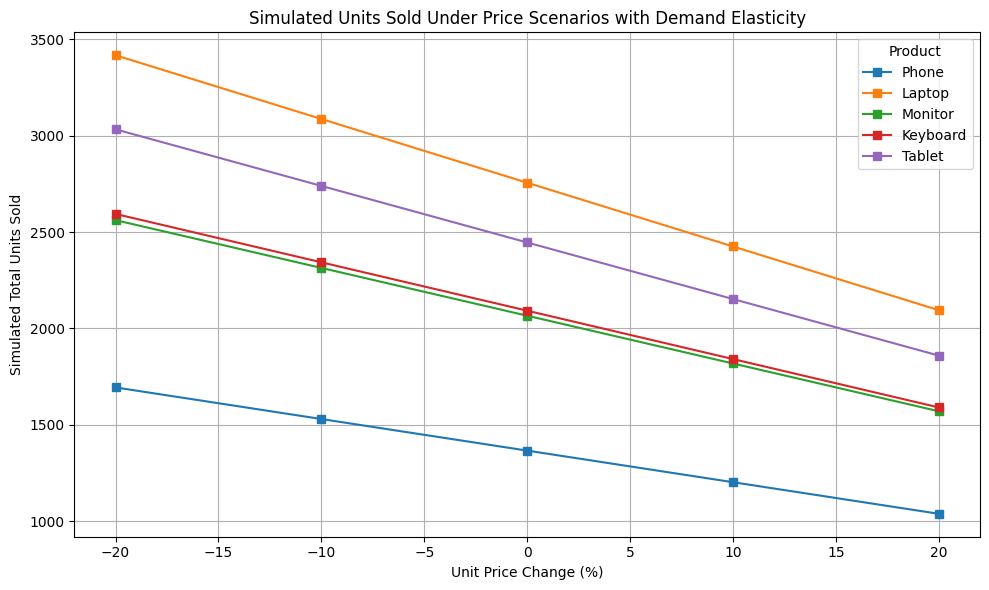

Simulated Revenue and Units Sold Table:


Product  Price Change %  Simulated Revenue  Simulated Units Sold
0      Phone           -20.0       8.813614e+05               1693.84
1      Phone           -10.0       8.955769e+05               1529.92
2      Phone             0.0       8.884692e+05               1366.00
3      Phone            10.0       8.600382e+05               1202.08
4      Phone            20.0       8.102839e+05               1038.16
5     Laptop           -20.0       1.713580e+06               3417.44
6     Laptop           -10.0       1.741219e+06               3086.72
7     Laptop             0.0       1.727400e+06               2756.00
8     Laptop            10.0       1.672123e+06               2425.28
9     Laptop            20.0       1.575388e+06               2094.56
10   Monitor           -20.0       1.020904e+06               2561.84
11   Monitor           -10.0       1.037371e+06               2313.92
12   Monitor             0.0       1.029137e+06               2066.00
13   Monitor            10.0       9.962051e+05               1818.08
14   Monitor            20.0       9.385734e+05               1570.16
15  Keyboard           -20.0       1.118689e+06               2594.08
16  Keyboard           -10.0       1.136733e+06               2343.04
17  Keyboard             0.0       1.127711e+06               2092.00
18  Keyboard            10.0       1.091624e+06               1840.96
19  Keyboard            20.0       1.028472e+06               1589.92
20    Tablet           -20.0       1.595552e+06               3033.04
21    Tablet           -10.0       1.621287e+06               2739.52
22    Tablet             0.0       1.608420e+06               2446.00
23    Tablet            10.0       1.556950e+06               2152.48
24    Tablet            20.0       1.466879e+06               1858.96

In [82]:
# Simulate Unit Price Scenarios with Demand Elasticity
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_salesone = pd.read_csv('salesone.csv')
products = df_salesone['Product'].unique()

# Define price change scenarios (e.g., -20%, -10%, 0%, +10%, +20%)
price_changes = np.array([-0.2, -0.1, 0, 0.1, 0.2])

# Assume a price elasticity of demand (negative means demand drops as price rises)
# Example: elasticity = -1.2 (for every 1% increase in price, units sold drops by 1.2%)
elasticity = -1.2

scenario_results = []

for product in products:
    prod_df = df_salesone[df_salesone['Product'] == product]
    avg_units = prod_df['Units Sold'].mean()
    base_price = prod_df['Unit Price'].mean()
    n_periods = len(prod_df)
    for pct in price_changes:
        new_price = base_price * (1 + pct)
        # Adjust units sold based on elasticity
        new_units = avg_units * (1 + elasticity * pct)
        new_units = max(new_units, 0)  # Units sold can't be negative
        new_revenue = new_units * new_price * n_periods
        scenario_results.append({'Product': product, 'Price Change %': pct*100, 'Simulated Revenue': new_revenue, 'Simulated Units Sold': new_units * n_periods})

scenario_df = pd.DataFrame(scenario_results)

# Plot revenue
plt.figure(figsize=(10,6))
for product in products:
    data = scenario_df[scenario_df['Product'] == product]
    plt.plot(data['Price Change %'], data['Simulated Revenue'], marker='o', label=product)
plt.title('Simulated Revenue Under Price Scenarios with Demand Elasticity')
plt.xlabel('Unit Price Change (%)')
plt.ylabel('Simulated Total Revenue')
plt.legend(title='Product')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot units sold
plt.figure(figsize=(10,6))
for product in products:
    data = scenario_df[scenario_df['Product'] == product]
    plt.plot(data['Price Change %'], data['Simulated Units Sold'], marker='s', label=product)
plt.title('Simulated Units Sold Under Price Scenarios with Demand Elasticity')
plt.xlabel('Unit Price Change (%)')
plt.ylabel('Simulated Total Units Sold')
plt.legend(title='Product')
plt.grid(True)
plt.tight_layout()
plt.show()

print('Simulated Revenue and Units Sold Table:')
display(scenario_df)


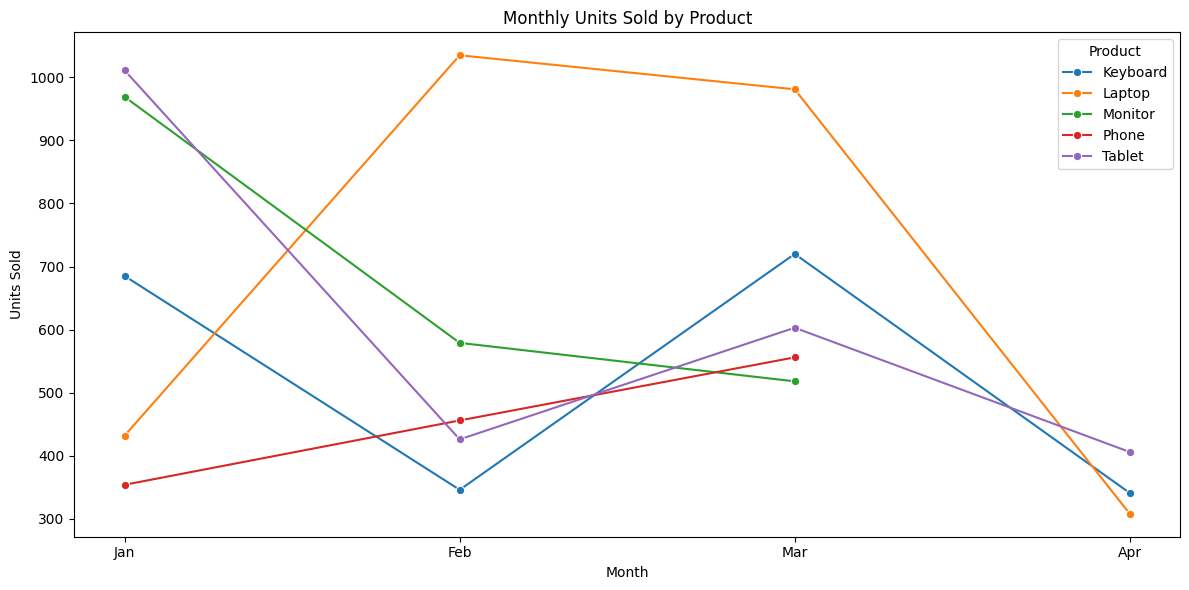

Peak Month for Each Product:


Product Month  Units Sold
3   Keyboard   Mar         720
5     Laptop   Feb        1035
9    Monitor   Jan         969
13     Phone   Mar         556
16    Tablet   Jan        1011

In [83]:
# Analyze Product Sales Peaks by Month
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_salesone = pd.read_csv('salesone.csv', parse_dates=['Date'], dayfirst=True)
df_salesone['Month'] = df_salesone['Date'].dt.strftime('%b')

# Group by Product and Month, sum Units Sold
monthly_product_sales = df_salesone.groupby(['Product', 'Month'])['Units Sold'].sum().reset_index()

# Order months chronologically
from pandas.api.types import CategoricalDtype
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_product_sales['Month'] = monthly_product_sales['Month'].astype(CategoricalDtype(categories=month_order, ordered=True))

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_product_sales, x='Month', y='Units Sold', hue='Product', marker='o')
plt.title('Monthly Units Sold by Product')
plt.ylabel('Units Sold')
plt.xlabel('Month')
plt.legend(title='Product')
plt.tight_layout()
plt.show()

# Show table of peak month for each product
peak_months = monthly_product_sales.loc[monthly_product_sales.groupby('Product')['Units Sold'].idxmax()][['Product', 'Month', 'Units Sold']]
print('Peak Month for Each Product:')
display(peak_months)


In [84]:
# Estimate Reorder Point for High Demand Products
import pandas as pd
import numpy as np
from datetime import timedelta

# Load data
df_salesone = pd.read_csv('salesone.csv', parse_dates=['Date'], dayfirst=True)

# Define high demand as top 3 products by total units sold
top_products = df_salesone.groupby('Product')['Units Sold'].sum().sort_values(ascending=False).head(3).index.tolist()

# Assume a starting inventory for each product (can be customized)
starting_inventory = 500  # units

# Calculate recent average daily sales rate (last 30 days in data)
last_date = df_salesone['Date'].max()
window_start = last_date - pd.Timedelta(days=30)
recent_sales = df_salesone[df_salesone['Date'] >= window_start]

reorder_estimates = []
for product in top_products:
    prod_sales = recent_sales[recent_sales['Product'] == product]
    if not prod_sales.empty:
        daily_rate = prod_sales['Units Sold'].sum() / 30
        if daily_rate > 0:
            days_left = starting_inventory / daily_rate
            est_runout_date = last_date + timedelta(days=days_left)
        else:
            days_left = np.inf
            est_runout_date = 'N/A'
    else:
        days_left = np.inf
        est_runout_date = 'N/A'
    reorder_estimates.append({'Product': product, 'Avg Daily Sales (last 30d)': round(daily_rate,2) if not np.isinf(days_left) else 0, 'Days Until Out': round(days_left,1) if not np.isinf(days_left) else 'N/A', 'Est Runout Date': est_runout_date})

reorder_df = pd.DataFrame(reorder_estimates)
print('Reorder Estimates for High Demand Products (Assuming 500 units in stock):')
display(reorder_df)


Reorder Estimates for High Demand Products (Assuming 500 units in stock):


Product  Avg Daily Sales (last 30d)  Days Until Out  \
0    Laptop                       34.20            14.6   
1    Tablet                       25.57            19.6   
2  Keyboard                       21.83            22.9   

             Est Runout Date  
0 2023-04-24 14:52:37.894737  
1 2023-04-29 13:21:40.130378  
2 2023-05-02 21:37:05.954198

Average Units Sold per Product in Each Region:


Product    Keyboard      Laptop     Monitor   Phone      Tablet
Region                                                         
East     126.400000  105.333333   69.666667   78.20  119.000000
North    124.333333   96.800000   64.000000  172.50   91.500000
South     75.500000  141.500000  112.500000  134.75  143.500000
West     133.714286   84.285714   85.000000   91.00  112.166667

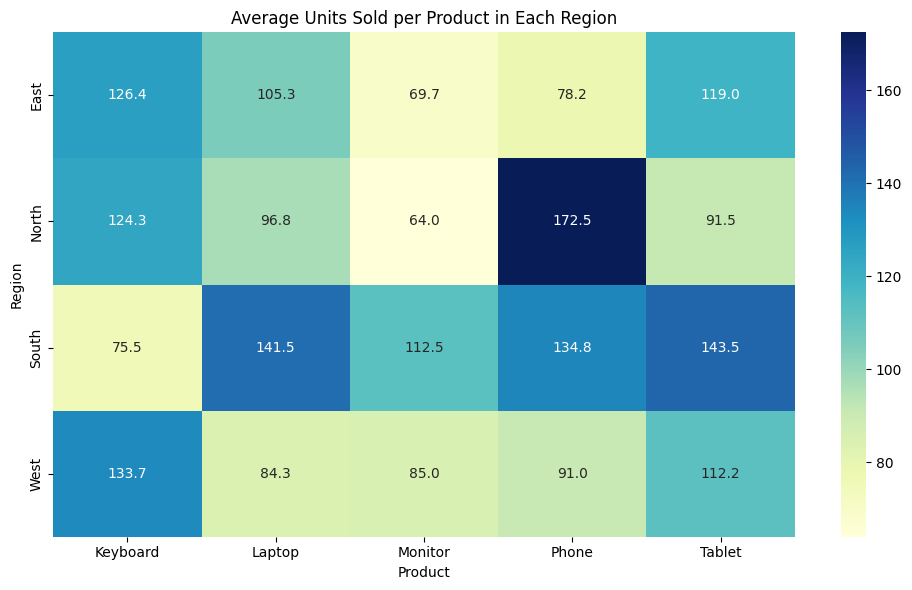

In [85]:
# Compare Average Sales per Product in Each Region
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_salesone = pd.read_csv('salesone.csv')

# Calculate average sales (units sold) per product in each region
avg_sales = df_salesone.groupby(['Region', 'Product'])['Units Sold'].mean().unstack()

print('Average Units Sold per Product in Each Region:')
display(avg_sales)

# Visualize as a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(avg_sales, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Average Units Sold per Product in Each Region')
plt.ylabel('Region')
plt.xlabel('Product')
plt.tight_layout()
plt.show()


Revenue per Unit Sold Efficiency Matrix:


C:\Users\2283297\AppData\Local\Temp\ipykernel_8004\390871768.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rev_per_unit = df_salesone.groupby(['Region', 'Product']).apply(lambda x: x['Total Revenue'].sum() / x['Units Sold'].sum() if x['Units Sold'].sum() > 0 else 0).unstack()


Product    Keyboard      Laptop     Monitor       Phone      Tablet
Region                                                             
East     428.240506  555.700949  759.172249  765.508951  573.123649
North    457.412869  674.604339  500.625000  367.365217  651.030055
South    590.026490  516.839223  479.693333  694.740260  642.128920
West     577.211538  661.059322  282.958170  420.000000  857.123328

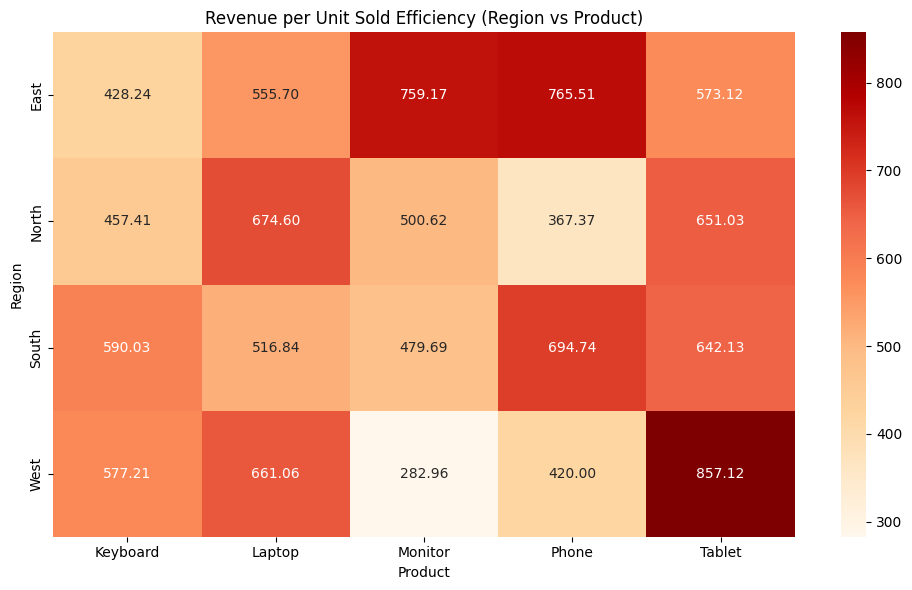

In [86]:
# Revenue per Unit Sold Efficiency Matrix (Region vs Product)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_salesone = pd.read_csv('salesone.csv')

# Calculate revenue per unit sold for each product in each region
rev_per_unit = df_salesone.groupby(['Region', 'Product']).apply(lambda x: x['Total Revenue'].sum() / x['Units Sold'].sum() if x['Units Sold'].sum() > 0 else 0).unstack()

print('Revenue per Unit Sold Efficiency Matrix:')
display(rev_per_unit)

# Visualize as a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(rev_per_unit, annot=True, fmt='.2f', cmap='OrRd')
plt.title('Revenue per Unit Sold Efficiency (Region vs Product)')
plt.ylabel('Region')
plt.xlabel('Product')
plt.tight_layout()
plt.show()


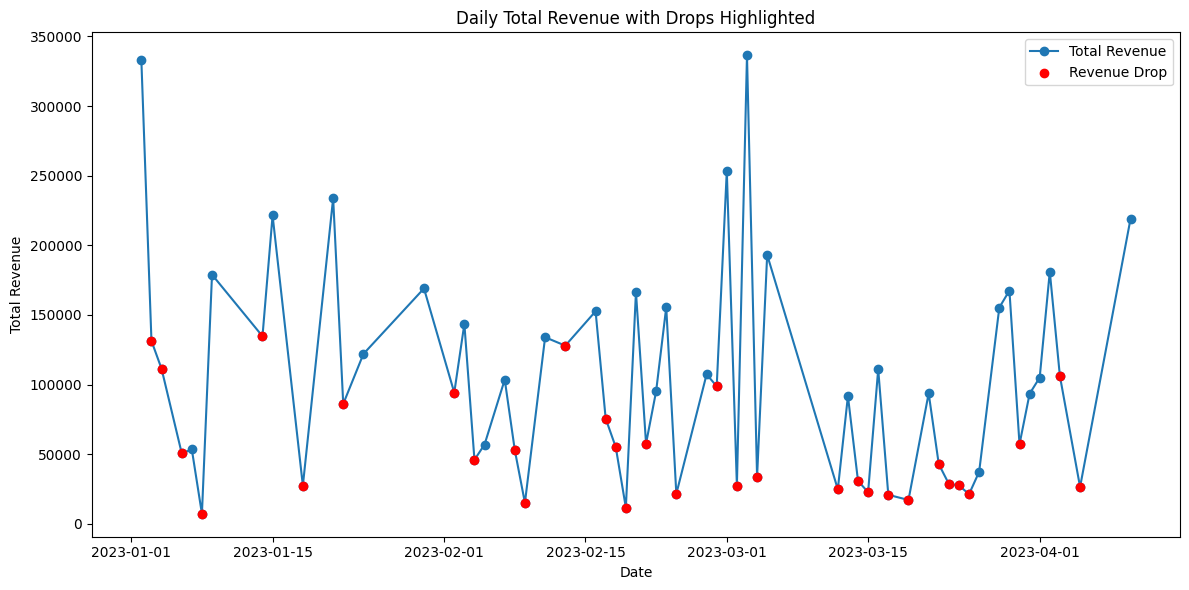

Days When Revenue Dropped from Previous Day:


Date  Total Revenue  Revenue Change
1  2023-01-03         131407       -201290.0
2  2023-01-04         111398        -20009.0
3  2023-01-06          50710        -60688.0
5  2023-01-08           7280        -46185.0
7  2023-01-14         134735        -44232.0
9  2023-01-18          27504       -193955.0
11 2023-01-22          86161       -147637.0
14 2023-02-02          94248        -74802.0
16 2023-02-04          46020        -97620.0
19 2023-02-08          52864        -50757.0
20 2023-02-09          15142        -37722.0
22 2023-02-13         127970         -6064.0
24 2023-02-17          75650        -77007.0
25 2023-02-18          55125        -20525.0
26 2023-02-19          11674        -43451.0
28 2023-02-21          57663       -108830.0
31 2023-02-24          21600       -133938.0
33 2023-02-28          98802         -8606.0
35 2023-03-02          27432       -226024.0
37 2023-03-04          33810       -302633.0
39 2023-03-12          24827       -168333.0
41 2023-03-14          30876        -60909.0
42 2023-03-15          22776         -8100.0
44 2023-03-17          20925        -90158.0
45 2023-03-19          17181         -3744.0
47 2023-03-22          42944        -50840.0
48 2023-03-23          28731        -14213.0
49 2023-03-24          27645         -1086.0
50 2023-03-25          21360         -6285.0
54 2023-03-30          57208       -110323.0
58 2023-04-03         106215        -74882.0
59 2023-04-05          26533        -79682.0

In [87]:
# Highlight Periods When Revenue Dropped from Previous Day
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_salesone = pd.read_csv('salesone.csv', parse_dates=['Date'], dayfirst=True)

# Aggregate total revenue by day
daily_revenue = df_salesone.groupby('Date')['Total Revenue'].sum().sort_index().reset_index()

# Calculate revenue change from previous day
daily_revenue['Revenue Change'] = daily_revenue['Total Revenue'].diff()
daily_revenue['Drop'] = daily_revenue['Revenue Change'] < 0

# Highlight drops on the plot
plt.figure(figsize=(12,6))
plt.plot(daily_revenue['Date'], daily_revenue['Total Revenue'], marker='o', label='Total Revenue')
plt.scatter(daily_revenue.loc[daily_revenue['Drop'], 'Date'],
            daily_revenue.loc[daily_revenue['Drop'], 'Total Revenue'],
            color='red', label='Revenue Drop', zorder=5)
plt.title('Daily Total Revenue with Drops Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()
plt.tight_layout()
plt.show()

# Show table of drops
drops = daily_revenue[daily_revenue['Drop']][['Date', 'Total Revenue', 'Revenue Change']]
print('Days When Revenue Dropped from Previous Day:')
display(drops)


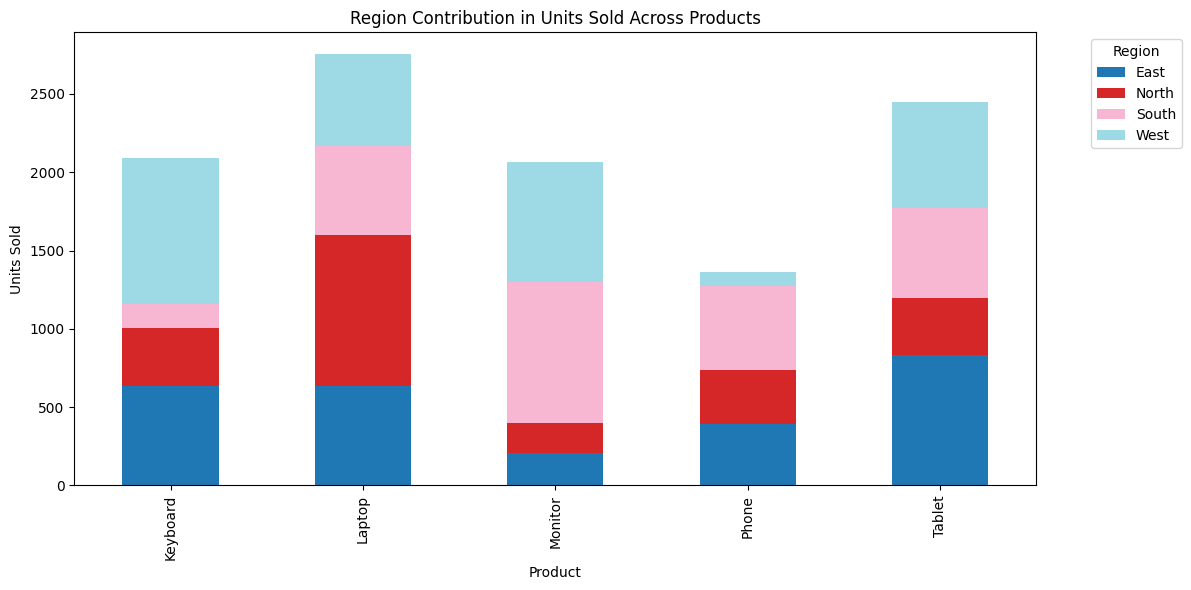

In [88]:
# Visualize Region Contribution in Units Sold Across Products
import pandas as pd
import matplotlib.pyplot as plt

df_salesone = pd.read_csv('salesone.csv')

# Pivot table: products as x, regions as stacked bars
units_by_region_product = df_salesone.pivot_table(index='Product', columns='Region', values='Units Sold', aggfunc='sum', fill_value=0)

# Plot stacked bar chart
units_by_region_product.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Region Contribution in Units Sold Across Products')
plt.ylabel('Units Sold')
plt.xlabel('Product')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Top Product Combinations by Revenue for Each Region:


Region      Product Combo  Total Revenue
11   East    Laptop + Tablet         828615
17   East     Tablet + Phone         776726
18   East  Tablet + Keyboard         748060
27  North    Laptop + Tablet         891294
24  North  Keyboard + Laptop         823632
28  North     Laptop + Phone         779758
0   South    Phone + Monitor         806189
5   South   Monitor + Tablet         800306
2   South     Phone + Tablet         743047
31   West  Keyboard + Tablet        1117114
37   West    Tablet + Laptop         966869
32   West  Keyboard + Laptop         930295

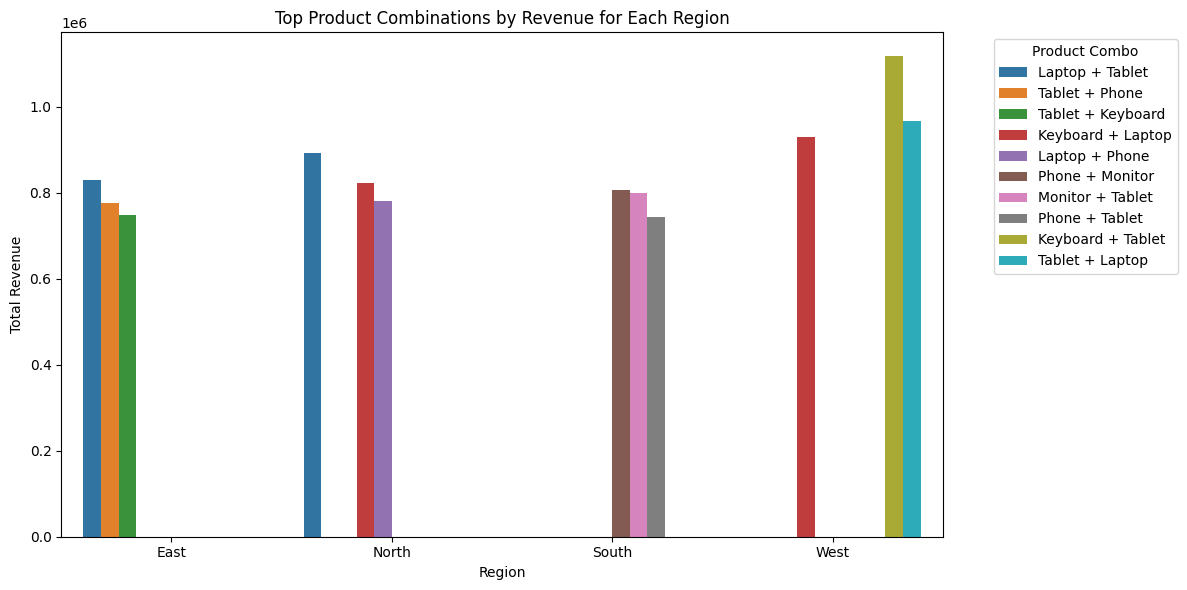

In [89]:
# Analyze Top Product Combinations Contributing to Revenue by Region
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Load data
df_salesone = pd.read_csv('salesone.csv')

# For each region, find top 3 product pairs by total revenue
regions = df_salesone['Region'].unique()
combo_results = []

for region in regions:
    reg_df = df_salesone[df_salesone['Region'] == region]
    products = reg_df['Product'].unique()
    # All possible product pairs
    for prod1, prod2 in combinations(products, 2):
        combo_revenue = reg_df[reg_df['Product'].isin([prod1, prod2])]['Total Revenue'].sum()
        combo_results.append({'Region': region, 'Product Combo': f'{prod1} + {prod2}', 'Total Revenue': combo_revenue})

combo_df = pd.DataFrame(combo_results)

# For each region, get top 3 combos
top_combos = combo_df.sort_values(['Region', 'Total Revenue'], ascending=[True, False]).groupby('Region').head(3)

print('Top Product Combinations by Revenue for Each Region:')
display(top_combos)

# Visualize
plt.figure(figsize=(12,6))
sns.barplot(data=top_combos, x='Region', y='Total Revenue', hue='Product Combo')
plt.title('Top Product Combinations by Revenue for Each Region')
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.legend(title='Product Combo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [90]:
# Find Most Profitable Product in Each Region
import pandas as pd

df_salesone = pd.read_csv('salesone.csv')

# Group by Region and Product, sum Profit
profit_by_region_product = df_salesone.groupby(['Region', 'Product'])['Profit'].sum().reset_index()

# For each region, find the product with the highest profit
idx = profit_by_region_product.groupby('Region')['Profit'].idxmax()
most_profitable = profit_by_region_product.loc[idx].reset_index(drop=True)

print('Most Profitable Product in Each Region:')
display(most_profitable)


Most Profitable Product in Each Region:


Region  Product  Profit
0   East   Tablet   28237
1  North   Laptop   25947
2  South  Monitor   27614
3   West  Monitor   48774

In [91]:
# Find Which Day of the Week Yields the Highest Revenue
import pandas as pd

df_salesone = pd.read_csv('salesone.csv', parse_dates=['Date'], dayfirst=True)
df_salesone['DayOfWeek'] = df_salesone['Date'].dt.day_name()

# Group by day of week and sum revenue
dow_revenue = df_salesone.groupby('DayOfWeek')['Total Revenue'].sum().reset_index()

# Order days of week
from pandas.api.types import CategoricalDtype
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_revenue['DayOfWeek'] = dow_revenue['DayOfWeek'].astype(CategoricalDtype(categories=days_order, ordered=True))
dow_revenue = dow_revenue.sort_values('DayOfWeek')

print('Total Revenue by Day of the Week:')
display(dow_revenue)

# Find the day with the highest revenue
max_day = dow_revenue.loc[dow_revenue['Total Revenue'].idxmax()]
print(f"\nDay with Highest Revenue: {max_day['DayOfWeek']} (Revenue: {max_day['Total Revenue']})")


Total Revenue by Day of the Week:


DayOfWeek  Total Revenue
1     Monday        1499632
5    Tuesday         793525
6  Wednesday         800307
4   Thursday         642039
0     Friday         770045
2   Saturday         817439
3     Sunday         837245


Day with Highest Revenue: Monday (Revenue: 1499632)


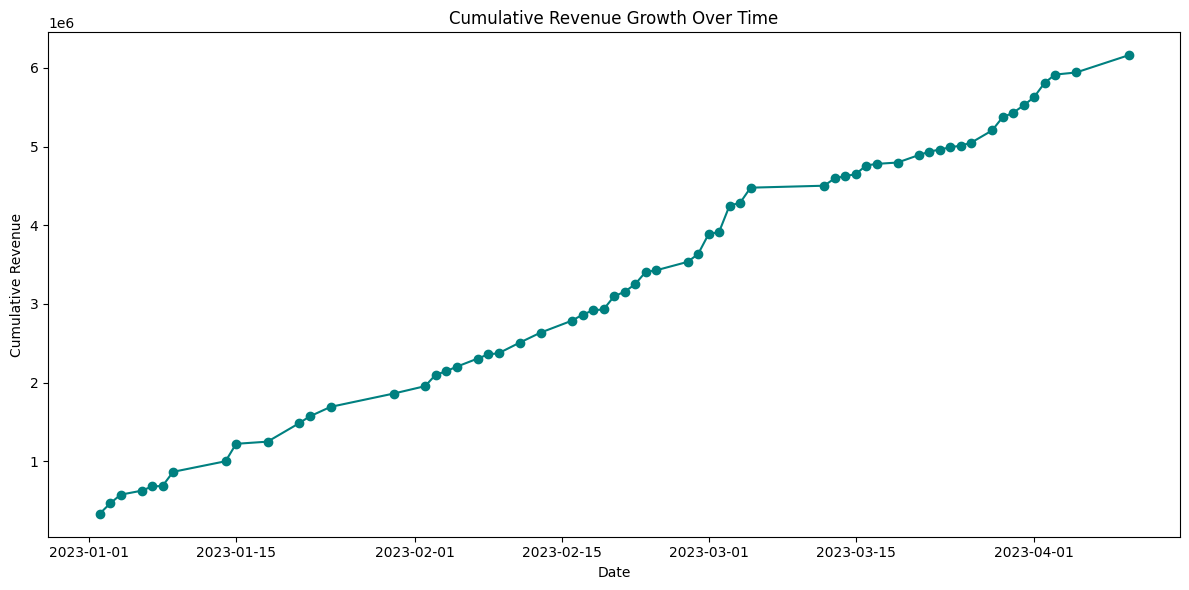

Cumulative Revenue Table:


Date  Total Revenue  Cumulative Revenue
0  2023-01-02         332697              332697
1  2023-01-03         131407              464104
2  2023-01-04         111398              575502
3  2023-01-06          50710              626212
4  2023-01-07          53465              679677
..        ...            ...                 ...
56 2023-04-01         105092             5627340
57 2023-04-02         181097             5808437
58 2023-04-03         106215             5914652
59 2023-04-05          26533             5941185
60 2023-04-10         219047             6160232

[61 rows x 3 columns]

In [92]:
# Track How Revenue Grows Over Time
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_salesone = pd.read_csv('salesone.csv', parse_dates=['Date'], dayfirst=True)

# Aggregate daily revenue and calculate cumulative sum
daily_revenue = df_salesone.groupby('Date')['Total Revenue'].sum().sort_index().reset_index()
daily_revenue['Cumulative Revenue'] = daily_revenue['Total Revenue'].cumsum()

plt.figure(figsize=(12,6))
plt.plot(daily_revenue['Date'], daily_revenue['Cumulative Revenue'], marker='o', color='teal')
plt.title('Cumulative Revenue Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.tight_layout()
plt.show()

print('Cumulative Revenue Table:')
display(daily_revenue)


In [94]:
# Filter and Display Only Rows Where Units Sold is in Top 10%
import pandas as pd

df_salesone = pd.read_csv('salesone.csv')

# Calculate the 90th percentile threshold
threshold = df_salesone['Units Sold'].quantile(0.9)

# Filter rows where units sold is in the top 10%
top10_df = df_salesone[df_salesone['Units Sold'] >= threshold]

print(f"Rows Where Units Sold is in the Top 10% (Threshold: {threshold}):")
display(top10_df[['Date', 'Product', 'Region', 'Units Sold']])


Rows Where Units Sold is in the Top 10% (Threshold: 173.20000000000002):


Date   Product Region  Units Sold
18  30-01-2023    Tablet  North         175
31  28-02-2023    Tablet   East         198
32  11-02-2023   Monitor   East         178
46  07-01-2023   Monitor   West         185
47  21-01-2023  Keyboard   West         196
55  09-01-2023    Tablet   East         191
71  04-01-2023   Monitor   West         181
82  03-02-2023  Keyboard   East         190
85  10-04-2023    Tablet  South         197
97  23-03-2023     Phone  North         183

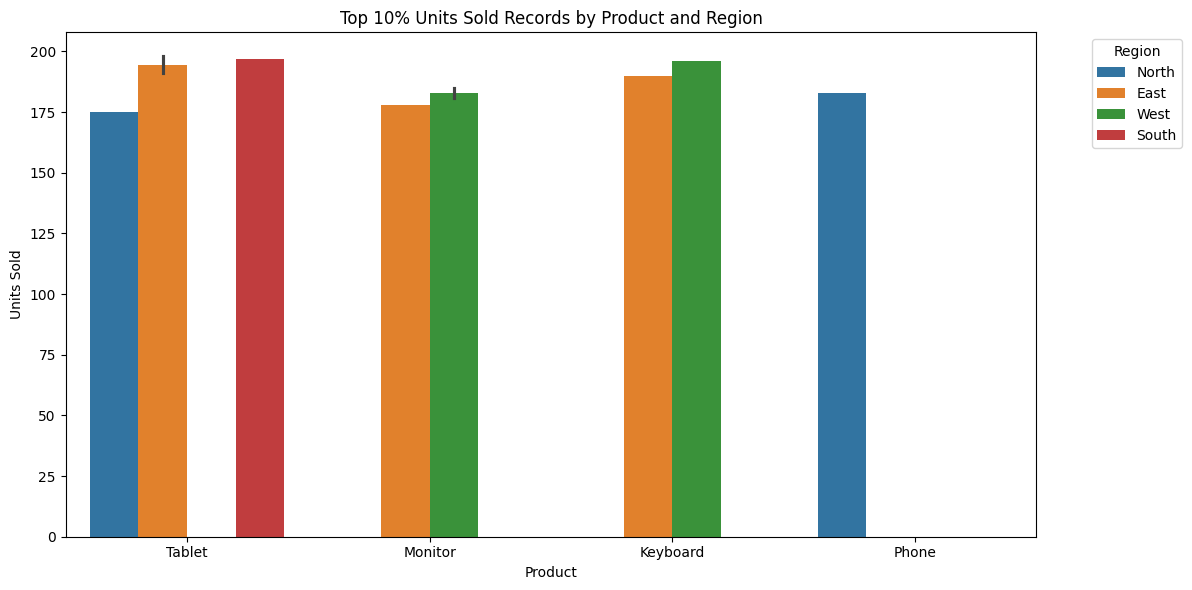

In [95]:
# Visualize Top 10% Units Sold Records by Product and Region
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_salesone = pd.read_csv('salesone.csv')
threshold = df_salesone['Units Sold'].quantile(0.9)
top10_df = df_salesone[df_salesone['Units Sold'] >= threshold]

plt.figure(figsize=(12,6))
sns.barplot(data=top10_df, x='Product', y='Units Sold', hue='Region')
plt.title('Top 10% Units Sold Records by Product and Region')
plt.ylabel('Units Sold')
plt.xlabel('Product')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Monthly Revenue Target: 200000


Month  Total Revenue  Shortfall
0  2023-01        1860657          0
1  2023-02        1772464          0
2  2023-03        1889127          0
3  2023-04         637984          0

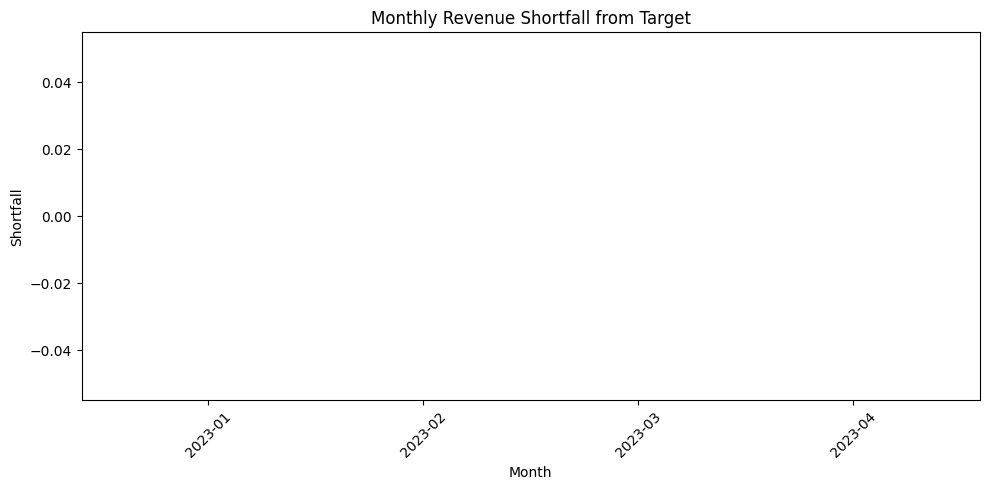

In [96]:
# Show Shortfall from a Monthly Revenue Target
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_salesone = pd.read_csv('salesone.csv', parse_dates=['Date'], dayfirst=True)
df_salesone['Month'] = df_salesone['Date'].dt.to_period('M')

# Set monthly revenue target (customize as needed)
monthly_target = 200000  # Example target

# Calculate monthly revenue
monthly_revenue = df_salesone.groupby('Month')['Total Revenue'].sum().reset_index()
monthly_revenue['Shortfall'] = monthly_target - monthly_revenue['Total Revenue']
monthly_revenue['Shortfall'] = monthly_revenue['Shortfall'].clip(lower=0)

print(f'Monthly Revenue Target: {monthly_target}')
display(monthly_revenue)

# Visualize shortfall
plt.figure(figsize=(10,5))
plt.bar(monthly_revenue['Month'].astype(str), monthly_revenue['Shortfall'], color='crimson')
plt.title('Monthly Revenue Shortfall from Target')
plt.xlabel('Month')
plt.ylabel('Shortfall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sample of Revenue Deviation per Product:


Date  Product Region  Total Revenue   Avg Revenue  Revenue Deviation
0  21-02-2023    Phone  South          57663  69895.000000      -12232.000000
1  03-04-2023   Laptop   East          43838  62473.185185      -18635.185185
2  15-01-2023  Monitor  South         128778  39259.739130       89518.260870
3  13-03-2023  Monitor   East          13284  39259.739130      -25975.739130
4  02-03-2023  Monitor  North          27432  39259.739130      -11827.739130

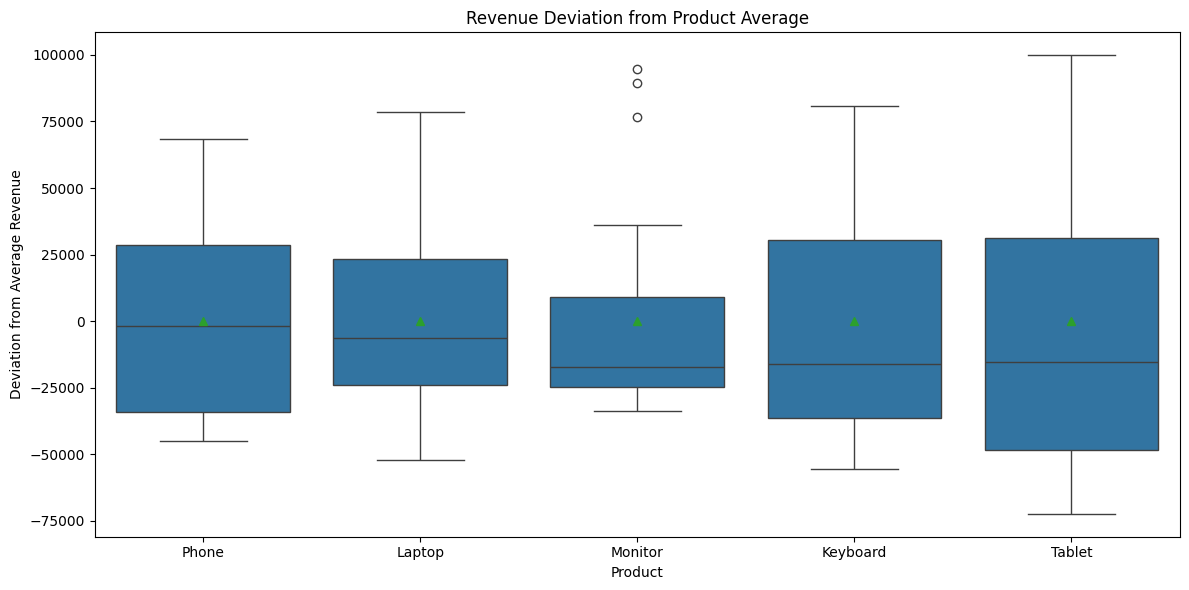

In [97]:
# Check How Each Product Deviates from Its Average Revenue
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_salesone = pd.read_csv('salesone.csv')

# Calculate average revenue per product
avg_revenue = df_salesone.groupby('Product')['Total Revenue'].mean().rename('Avg Revenue').reset_index()

# Merge with original data
df_merged = df_salesone.merge(avg_revenue, on='Product')
df_merged['Revenue Deviation'] = df_merged['Total Revenue'] - df_merged['Avg Revenue']

print('Sample of Revenue Deviation per Product:')
display(df_merged[['Date', 'Product', 'Region', 'Total Revenue', 'Avg Revenue', 'Revenue Deviation']].head())

# Visualize deviation for each product
plt.figure(figsize=(12,6))
sns.boxplot(data=df_merged, x='Product', y='Revenue Deviation', showmeans=True)
plt.title('Revenue Deviation from Product Average')
plt.ylabel('Deviation from Average Revenue')
plt.xlabel('Product')
plt.tight_layout()
plt.show()


In [98]:
# Auto-Detect Missing or Inconsistent Data
import pandas as pd

df_salesone = pd.read_csv('salesone.csv')

# Check for missing values
display(df_salesone.isnull().sum().to_frame('Missing Values'))

# Check for negative or zero values in columns that should be positive
num_cols = ['Units Sold', 'Unit Price', 'Total Revenue', 'Profit']
for col in num_cols:
    invalid = df_salesone[df_salesone[col] <= 0]
    if not invalid.empty:
        print(f'Rows with non-positive values in {col}:')
        display(invalid)

# Check for duplicate rows
duplicates = df_salesone[df_salesone.duplicated()]
if not duplicates.empty:
    print('Duplicate Rows Detected:')
    display(duplicates)
else:
    print('No duplicate rows detected.')


Missing Values
Date                        0
Product                     0
Region                      0
Units Sold                  0
Unit Price                  0
Total Revenue               0
Profit                      0
Discount                    0

No duplicate rows detected.


In [99]:
# Flag Sudden Day-over-Day Revenue Drop > 30%
import pandas as pd

# Load data
df_salesone = pd.read_csv('salesone.csv', parse_dates=['Date'], dayfirst=True)

# Aggregate daily revenue
daily_revenue = df_salesone.groupby('Date')['Total Revenue'].sum().sort_index().reset_index()

# Calculate percent change from previous day
daily_revenue['Pct_Change'] = daily_revenue['Total Revenue'].pct_change()

# Flag days with >30% drop
daily_revenue['Flag_Drop_Over_30pct'] = daily_revenue['Pct_Change'] < -0.3

# Show flagged days
flagged = daily_revenue[daily_revenue['Flag_Drop_Over_30pct']][['Date', 'Total Revenue', 'Pct_Change']]
print('Days with Revenue Drop > 30% from Previous Day:')
display(flagged)


Days with Revenue Drop > 30% from Previous Day:


Date  Total Revenue  Pct_Change
1  2023-01-03         131407   -0.605025
3  2023-01-06          50710   -0.544785
5  2023-01-08           7280   -0.863836
9  2023-01-18          27504   -0.875805
11 2023-01-22          86161   -0.631472
14 2023-02-02          94248   -0.442484
16 2023-02-04          46020   -0.679616
19 2023-02-08          52864   -0.489833
20 2023-02-09          15142   -0.713567
24 2023-02-17          75650   -0.504445
26 2023-02-19          11674   -0.788227
28 2023-02-21          57663   -0.653661
31 2023-02-24          21600   -0.861127
35 2023-03-02          27432   -0.891768
37 2023-03-04          33810   -0.899507
39 2023-03-12          24827   -0.871469
41 2023-03-14          30876   -0.663605
44 2023-03-17          20925   -0.811627
47 2023-03-22          42944   -0.542097
48 2023-03-23          28731   -0.330966
54 2023-03-30          57208   -0.658523
58 2023-04-03         106215   -0.413491
59 2023-04-05          26533   -0.750195

In [102]:
# Suggest Reasons for Unit Price * Units Sold Not Equal to Total Revenue
import pandas as pd

df_salesone = pd.read_csv('salesone.csv')
expected_revenue = df_salesone['Unit Price'] * df_salesone['Units Sold']
df_salesone['Revenue_Match'] = abs(df_salesone['Total Revenue'] - expected_revenue) < 1e-2
mismatches = df_salesone[~df_salesone['Revenue_Match']]

if mismatches.empty:
    print('All rows: Unit Price * Units Sold equals Total Revenue (within rounding tolerance).')
else:
    print('Rows where Unit Price * Units Sold does NOT equal Total Revenue:')
    display(mismatches[['Date', 'Product', 'Region', 'Units Sold', 'Unit Price', 'Total Revenue']])
    print('\nPossible reasons for mismatch:')
    print('- Discounts or promotions applied to sales')
    print('- Returns or refunds processed')
    print('- Data entry errors or rounding issues')
    print('- Bundled sales or package deals')
    print('- Taxes, fees, or additional charges not reflected in unit price')


All rows: Unit Price * Units Sold equals Total Revenue (within rounding tolerance).


Product Demand (Units Sold) by Region:


Product  Keyboard  Laptop  Monitor  Phone  Tablet
Region                                           
East          632     632      209    391     833
North         373     968      192    345     366
South         151     566      900    539     574
West          936     590      765     91     673

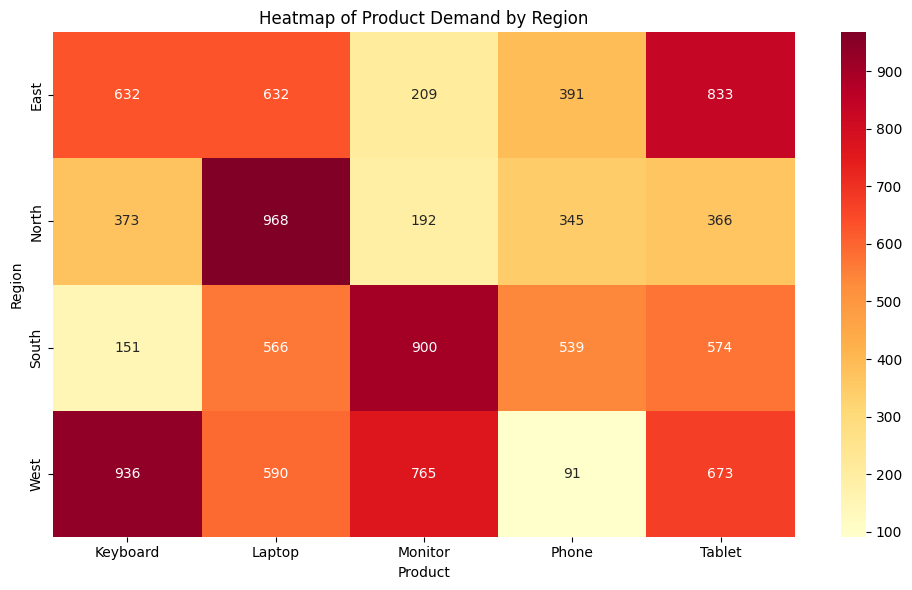

In [103]:
# Heatmap of Product Demand by Region
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_salesone = pd.read_csv('salesone.csv')

# Pivot table: products as columns, regions as rows, values as total units sold
demand_matrix = df_salesone.pivot_table(index='Region', columns='Product', values='Units Sold', aggfunc='sum', fill_value=0)

print('Product Demand (Units Sold) by Region:')
display(demand_matrix)

plt.figure(figsize=(10,6))
sns.heatmap(demand_matrix, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Heatmap of Product Demand by Region')
plt.ylabel('Region')
plt.xlabel('Product')
plt.tight_layout()
plt.show()


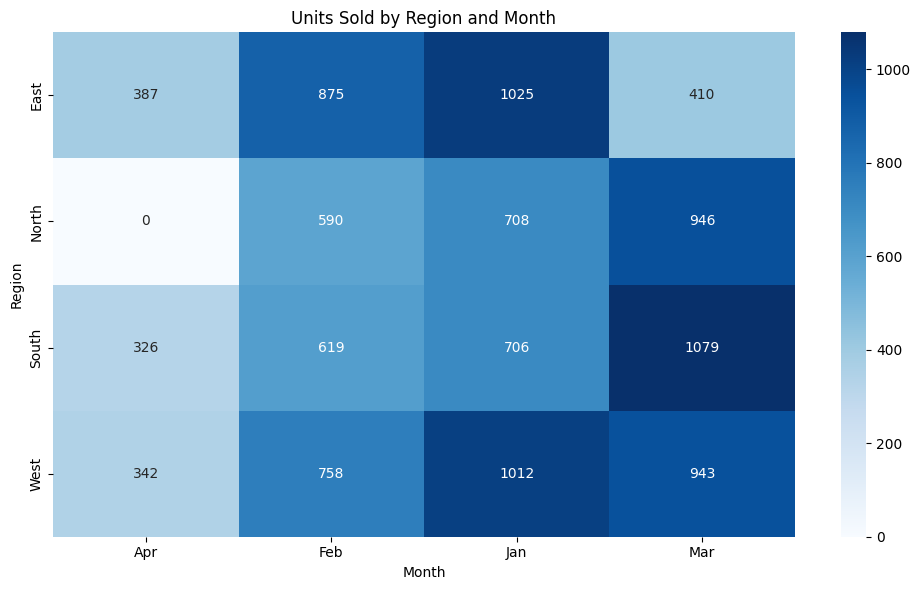

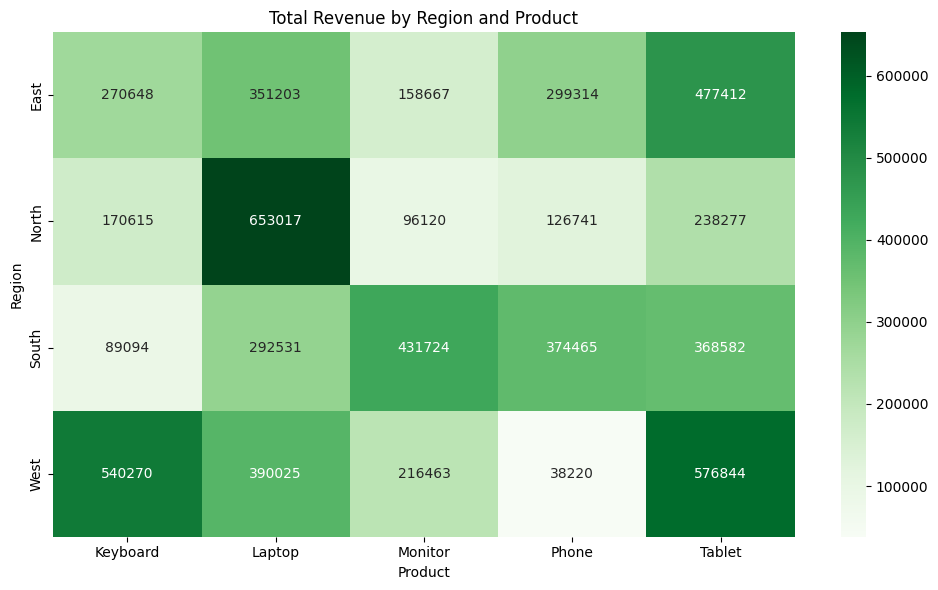

In [104]:
# Heatmaps of Product Demand by Region: Aggregated by Month and by Revenue
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df_salesone = pd.read_csv('salesone.csv', parse_dates=['Date'], dayfirst=True)
df_salesone['Month'] = df_salesone['Date'].dt.strftime('%b')

# 1. Heatmap: Units Sold by Region and Month
units_month_region = df_salesone.pivot_table(index='Region', columns='Month', values='Units Sold', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(units_month_region, annot=True, fmt='.0f', cmap='Blues')
plt.title('Units Sold by Region and Month')
plt.ylabel('Region')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# 2. Heatmap: Total Revenue by Region and Product
revenue_region_product = df_salesone.pivot_table(index='Region', columns='Product', values='Total Revenue', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(revenue_region_product, annot=True, fmt='.0f', cmap='Greens')
plt.title('Total Revenue by Region and Product')
plt.ylabel('Region')
plt.xlabel('Product')
plt.tight_layout()
plt.show()


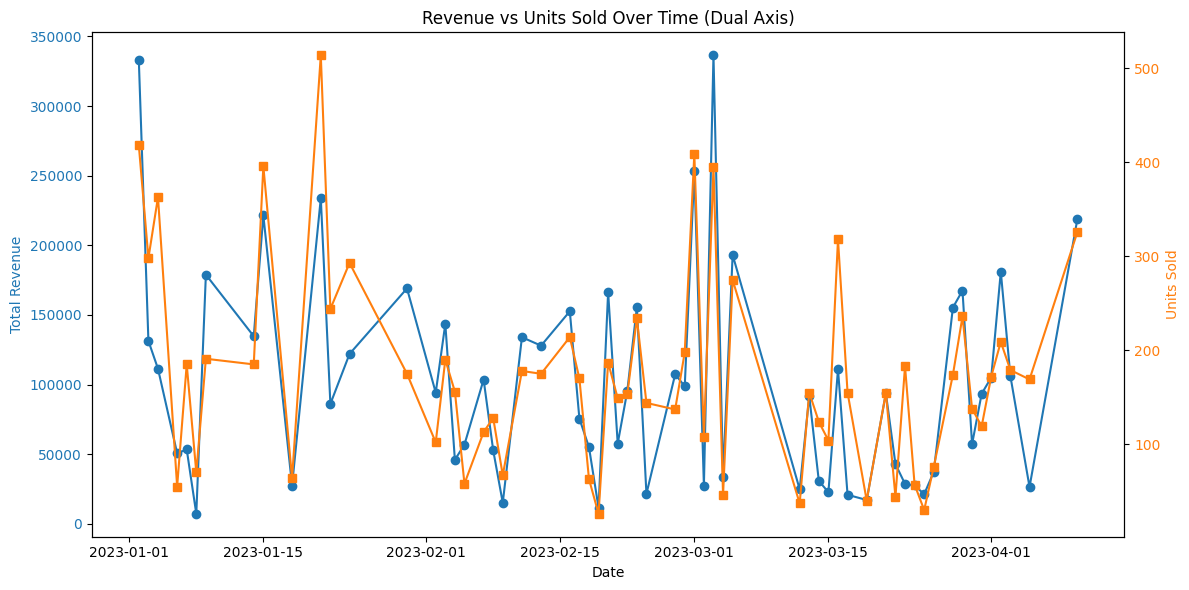

In [105]:
# Compare Revenue vs Units Sold Over Time Using Dual Axis Plot
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_salesone = pd.read_csv('salesone.csv', parse_dates=['Date'], dayfirst=True)

# Aggregate daily revenue and units sold
daily = df_salesone.groupby('Date').agg({'Total Revenue': 'sum', 'Units Sold': 'sum'}).sort_index().reset_index()

fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Revenue', color=color)
ax1.plot(daily['Date'], daily['Total Revenue'], color=color, marker='o', label='Total Revenue')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Units Sold', color=color)
ax2.plot(daily['Date'], daily['Units Sold'], color=color, marker='s', label='Units Sold')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Revenue vs Units Sold Over Time (Dual Axis)')
fig.tight_layout()
plt.show()


C:\Users\2283297\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


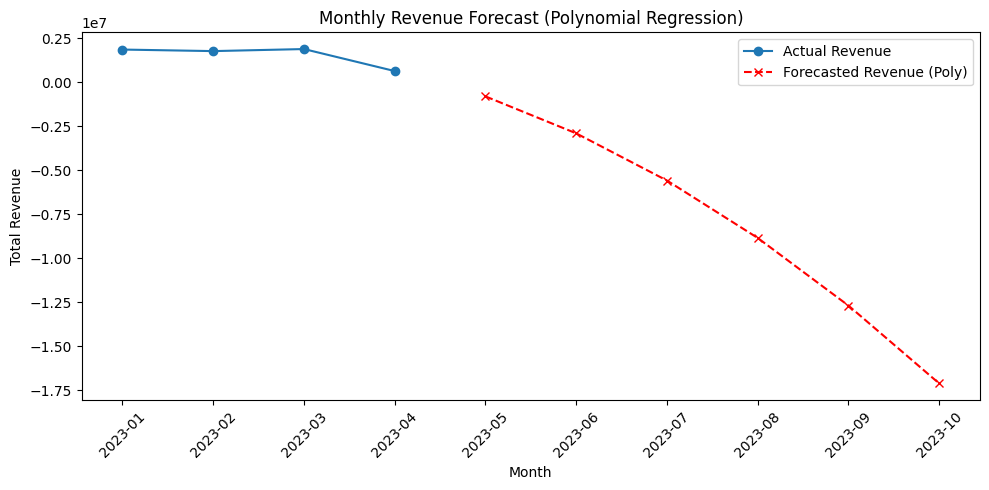

     Month  Forecasted Revenue
0  2023-05           -801468.5
1  2023-06          -2901029.1
2  2023-07          -5582064.7
3  2023-08          -8844575.3
4  2023-09         -12688560.9
5  2023-10         -17114021.5


In [106]:
# Forecast Revenue Using Polynomial Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load data
df_salesone = pd.read_csv('salesone.csv', parse_dates=['Date'], dayfirst=True)
df_salesone['Month'] = df_salesone['Date'].dt.to_period('M')
monthly_revenue = df_salesone.groupby('Month')['Total Revenue'].sum().reset_index()
monthly_revenue['MonthNum'] = np.arange(len(monthly_revenue))

# Prepare data for polynomial regression
X = monthly_revenue[['MonthNum']]
y = monthly_revenue['Total Revenue']
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

# Forecast next 6 months
future_months = np.arange(len(monthly_revenue), len(monthly_revenue)+6)
future_dates = pd.date_range(monthly_revenue['Month'].dt.to_timestamp().max()+pd.offsets.MonthBegin(1), periods=6, freq='MS')
future_X_poly = poly.transform(future_months.reshape(-1,1))
future_revenue = model.predict(future_X_poly)

# Plot actual and forecasted revenue
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue['Month'].astype(str), monthly_revenue['Total Revenue'], marker='o', label='Actual Revenue')
plt.plot(future_dates.strftime('%Y-%m'), future_revenue, marker='x', linestyle='--', color='red', label='Forecasted Revenue (Poly)')
plt.title('Monthly Revenue Forecast (Polynomial Regression)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print forecasted revenue values
forecast_df = pd.DataFrame({'Month': future_dates.strftime('%Y-%m'), 'Forecasted Revenue': future_revenue})
print(forecast_df)


In [107]:
# Estimate Revenue Lost if Units Sold Was Capped Due to Inventory Shortage
import pandas as pd

# Load data
df_salesone = pd.read_csv('salesone.csv')

# Set hypothetical inventory cap per sale (customize as needed)
unit_cap = 100

# Calculate capped units sold and capped revenue
capped_units = df_salesone['Units Sold'].clip(upper=unit_cap)
df_salesone['Capped Revenue'] = capped_units * df_salesone['Unit Price']

# Calculate revenue lost due to cap
revenue_lost = df_salesone['Total Revenue'] - df_salesone['Capped Revenue']
df_salesone['Revenue Lost'] = revenue_lost.clip(lower=0)

total_lost = df_salesone['Revenue Lost'].sum()

print(f"Total Revenue Lost Due to Inventory Cap of {unit_cap} Units per Sale: {total_lost:.2f}")
display(df_salesone[df_salesone['Revenue Lost'] > 0][['Date', 'Product', 'Region', 'Units Sold', 'Unit Price', 'Total Revenue', 'Capped Revenue', 'Revenue Lost']])


Total Revenue Lost Due to Inventory Cap of 100 Units per Sale: 1540695.00


Date   Product Region  Units Sold  Unit Price  Total Revenue  \
0   21-02-2023     Phone  South         149         387          57663   
2   15-01-2023   Monitor  South         169         762         128778   
4   02-03-2023   Monitor  North         108         254          27432   
5   21-01-2023  Keyboard  North         156         589          91884   
7   28-03-2023  Keyboard   West         140         884         123760   
8   16-03-2023  Keyboard  North         157         203          31871   
9   16-03-2023    Laptop   East         161         492          79212   
11  10-04-2023    Laptop  South         129         345          44505   
12  24-01-2023    Laptop  South         170         275          46750   
13  03-01-2023   Monitor   West         161         138          22218   
14  22-01-2023    Tablet  South         125         576          72000   
16  02-01-2023    Laptop  North         122         858         104676   
17  29-03-2023    Tablet   West         173         637         110201   
18  30-01-2023    Tablet  North         175         966         169050   
19  07-02-2023    Laptop  North         113         917         103621   
21  05-03-2023  Keyboard  South         121         624          75504   
22  01-03-2023     Phone  South         108         927         100116   
23  21-01-2023     Phone  North         162         605          98010   
24  02-02-2023    Laptop   West         102         924          94248   
25  17-03-2023   Monitor  South         155         135          20925   
26  27-02-2023    Laptop   West         137         784         107408   
27  22-01-2023   Monitor  South         119         119          14161   
30  01-04-2023  Keyboard   West         172         611         105092   
31  28-02-2023    Tablet   East         198         499          98802   
32  11-02-2023   Monitor   East         178         753         134034   
33  02-04-2023    Tablet   West         170         982         166940   
36  15-01-2023    Tablet   East         151         191          28841   
39  16-02-2023    Laptop  North         157         899         141143   
40  03-03-2023  Keyboard   West         137         826         113162   
41  20-02-2023     Phone  South         145         953         138185   
42  24-02-2023    Tablet  South         144         150          21600   
43  05-03-2023    Laptop  South         154         764         117656   
44  03-01-2023     Phone   East         137         797         109189   
46  07-01-2023   Monitor   West         185         289          53465   
47  21-01-2023  Keyboard   West         196         224          43904   
48  14-03-2023    Tablet  North         124         249          30876   
49  08-02-2023    Laptop  North         128         413          52864   
51  04-01-2023  Keyboard   East         167         441          73647   
53  01-03-2023  Keyboard   West         118         791          93338   
55  09-01-2023    Tablet   East         191         937         178967   
61  01-03-2023   Monitor  South         106         152          16112   
63  13-02-2023     Phone   East         120         719          86280   
66  04-02-2023  Keyboard   West         156         295          46020   
71  04-01-2023   Monitor   West         181         146          26426   
72  02-01-2023    Tablet   West         167         966         161322   
74  23-02-2023   Monitor  South         126         919         115794   
76  23-02-2023    Laptop  North         108         368          39744   
77  03-04-2023    Laptop   East         133         469          62377   
80  31-03-2023    Laptop  North         102         769          78438   
82  03-02-2023  Keyboard   East         190         756         143640   
83  15-03-2023    Laptop   East         104         219          22776   
84  03-03-2023    Tablet  South         108         930         100440   
85  10-04-2023    Tablet  South         197         886         174542   
86  14-01-2023

C:\Users\2283297\AppData\Local\Temp\ipykernel_8004\742797135.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_df['Price Bin'] = pd.cut(prod_df['Unit Price'], bins=bins, include_lowest=True)
C:\Users\2283297\AppData\Local\Temp\ipykernel_8004\742797135.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_revenue = prod_df.groupby('Price Bin')['Total Revenue'].sum().reset_index()


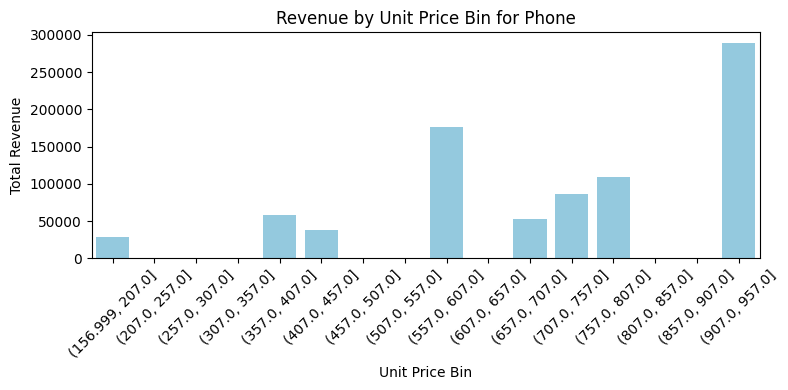

C:\Users\2283297\AppData\Local\Temp\ipykernel_8004\742797135.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_df['Price Bin'] = pd.cut(prod_df['Unit Price'], bins=bins, include_lowest=True)
C:\Users\2283297\AppData\Local\Temp\ipykernel_8004\742797135.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_revenue = prod_df.groupby('Price Bin')['Total Revenue'].sum().reset_index()


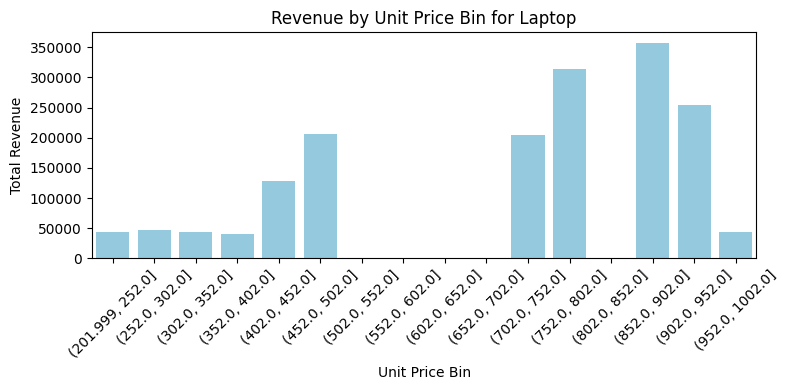

C:\Users\2283297\AppData\Local\Temp\ipykernel_8004\742797135.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_df['Price Bin'] = pd.cut(prod_df['Unit Price'], bins=bins, include_lowest=True)
C:\Users\2283297\AppData\Local\Temp\ipykernel_8004\742797135.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_revenue = prod_df.groupby('Price Bin')['Total Revenue'].sum().reset_index()


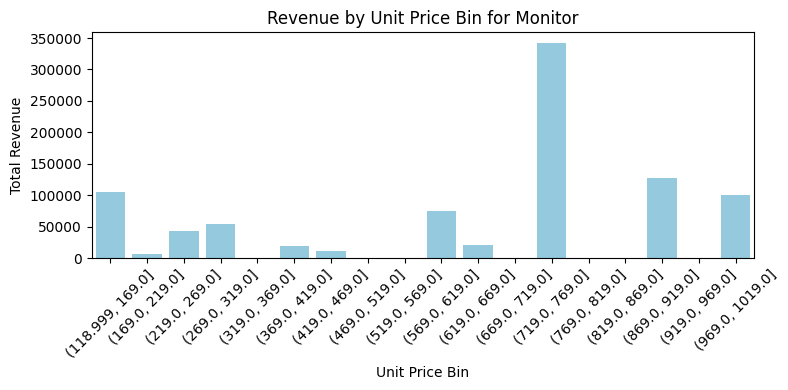

C:\Users\2283297\AppData\Local\Temp\ipykernel_8004\742797135.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_df['Price Bin'] = pd.cut(prod_df['Unit Price'], bins=bins, include_lowest=True)
C:\Users\2283297\AppData\Local\Temp\ipykernel_8004\742797135.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_revenue = prod_df.groupby('Price Bin')['Total Revenue'].sum().reset_index()


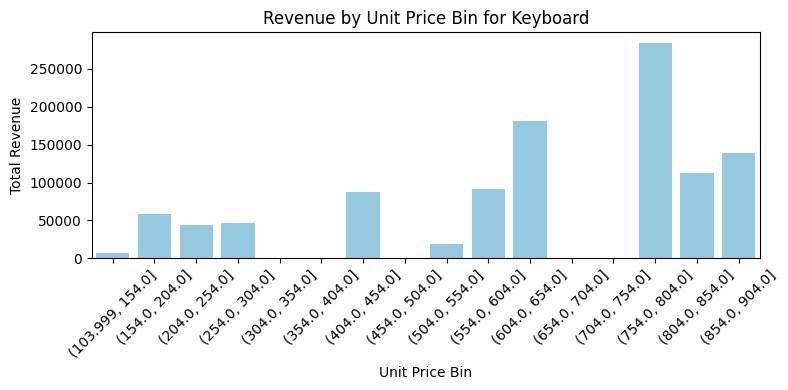

C:\Users\2283297\AppData\Local\Temp\ipykernel_8004\742797135.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_df['Price Bin'] = pd.cut(prod_df['Unit Price'], bins=bins, include_lowest=True)
C:\Users\2283297\AppData\Local\Temp\ipykernel_8004\742797135.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_revenue = prod_df.groupby('Price Bin')['Total Revenue'].sum().reset_index()


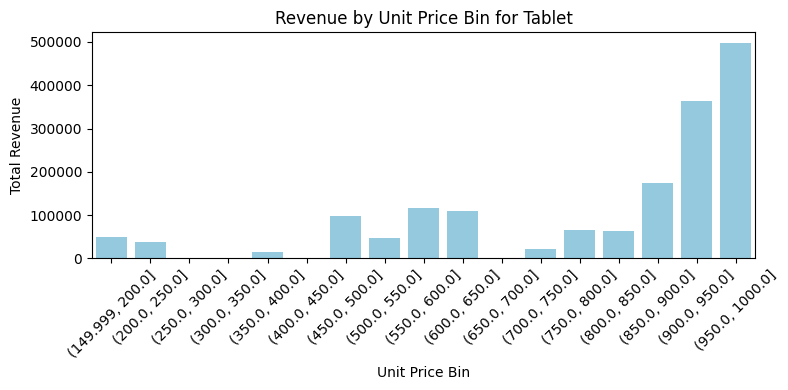

Suggested Optimal Price Ranges by Product:


Product Optimal Price Range  Revenue
0     Phone      (907.0, 957.0]   289011
1    Laptop      (852.0, 902.0]   357014
2   Monitor      (719.0, 769.0]   341975
3  Keyboard      (754.0, 804.0]   283838
4    Tablet     (950.0, 1000.0]   497312

In [108]:
# Suggest Optimal Pricing by Analyzing Price Points Driving Highest Revenue
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_salesone = pd.read_csv('salesone.csv')

# Bin unit prices for each product (bin width can be adjusted)
bin_width = 50
products = df_salesone['Product'].unique()
optimal_prices = []

for product in products:
    prod_df = df_salesone[df_salesone['Product'] == product]
    # Create price bins
    min_price, max_price = prod_df['Unit Price'].min(), prod_df['Unit Price'].max()
    bins = range(int(min_price), int(max_price) + bin_width, bin_width)
    prod_df['Price Bin'] = pd.cut(prod_df['Unit Price'], bins=bins, include_lowest=True)
    # Aggregate revenue by price bin
    bin_revenue = prod_df.groupby('Price Bin')['Total Revenue'].sum().reset_index()
    # Find price bin with highest revenue
    top_bin = bin_revenue.loc[bin_revenue['Total Revenue'].idxmax()]
    optimal_prices.append({'Product': product, 'Optimal Price Range': str(top_bin['Price Bin']), 'Revenue': top_bin['Total Revenue']})
    # Plot for each product
    plt.figure(figsize=(8,4))
    sns.barplot(data=bin_revenue, x='Price Bin', y='Total Revenue', color='skyblue')
    plt.title(f'Revenue by Unit Price Bin for {product}')
    plt.ylabel('Total Revenue')
    plt.xlabel('Unit Price Bin')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Show optimal price ranges
df_optimal = pd.DataFrame(optimal_prices)
print('Suggested Optimal Price Ranges by Product:')
display(df_optimal)


## Sales Strategy Insights & Recommendations

- **Optimize Pricing:** Focus on price ranges that historically drive the highest revenue for each product. Adjust pricing strategies to maximize revenue in these optimal bins.
- **Monitor Inventory for High Demand:** Products with frequent top 10% sales or those at risk of inventory shortfall should have proactive reorder strategies to avoid lost sales.
- **Targeted Promotions:** Use monthly and regional demand heatmaps to time and localize promotions, especially in months or regions with lower sales or higher shortfall.
- **Product Bundling:** Leverage top product combinations by region to create bundled offers that maximize revenue and cross-sell opportunities.
- **Address Revenue Drops:** Investigate and address days or periods with significant revenue drops (>30%) to identify operational or market issues.
- **Focus on Most Profitable Products:** Allocate marketing and inventory resources to the most profitable products in each region.
- **Improve Data Quality:** Regularly audit for missing, inconsistent, or anomalous data to ensure reliable decision-making.
- **Balance Revenue and Units Sold:** Use dual-axis and efficiency analyses to balance strategies between maximizing revenue and increasing sales volume.
- **Adjust for Seasonality:** Plan for inventory and promotions around months or days of the week with peak demand or revenue.
- **Elasticity-Aware Pricing:** Consider demand elasticity when adjusting prices to avoid revenue loss from reduced sales volume.

_These insights are based on the analyses and visualizations in this notebook. For best results, regularly update your data and revisit these strategies as market conditions change._


# Executive Sales KPIs and Visuals

A concise, high-level dashboard with 4 key KPIs and multiple sales breakdowns, all on a single, easy-to-read screen.

In [ ]:
# --- Prepare Data ---
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year
    df['Quarter'] = df['Date'].dt.to_period('Q').astype(str)
    df['Month'] = df['Date'].dt.to_period('M').astype(str)

In [ ]:
# --- Key KPIs ---
if not df.empty and 'Sales' in df.columns:
    total_sales = df['Sales'].sum()
    avg_sales = df['Sales'].mean()
    max_sales = df['Sales'].max()
    min_sales = df['Sales'].min()
    st.markdown("""
<div style='display:flex;gap:2rem;'>
  <div style='background:#e0e7ef;padding:1.2rem 2rem;border-radius:12px;min-width:180px;text-align:center;'>
    <div style='font-size:1.2rem;color:#2563eb;font-weight:700;'>Total Sales</div>
    <div style='font-size:1.5rem;font-weight:700;'>${:,.2f}</div>
  </div>
  <div style='background:#e0e7ef;padding:1.2rem 2rem;border-radius:12px;min-width:180px;text-align:center;'>
    <div style='font-size:1.2rem;color:#2563eb;font-weight:700;'>Avg Sale</div>
    <div style='font-size:1.5rem;font-weight:700;'>${:,.2f}</div>
  </div>
  <div style='background:#e0e7ef;padding:1.2rem 2rem;border-radius:12px;min-width:180px;text-align:center;'>
    <div style='font-size:1.2rem;color:#2563eb;font-weight:700;'>Max Sale</div>
    <div style='font-size:1.5rem;font-weight:700;'>${:,.2f}</div>
  </div>
  <div style='background:#e0e7ef;padding:1.2rem 2rem;border-radius:12px;min-width:180px;text-align:center;'>
    <div style='font-size:1.2rem;color:#2563eb;font-weight:700;'>Min Sale</div>
    <div style='font-size:1.5rem;font-weight:700;'>${:,.2f}</div>
  </div>
</div>
""".format(total_sales, avg_sales, max_sales, min_sales), unsafe_allow_html=True)

In [ ]:
# --- Sales by Year by Quarter ---
if 'Year' in df.columns and 'Quarter' in df.columns and 'Sales' in df.columns:
    yq_sales = df.groupby(['Year', 'Quarter'])['Sales'].sum().reset_index()
    fig_yq = px.bar(yq_sales, x='Quarter', y='Sales', color='Year', barmode='group', title='Sales by Year by Quarter')
    fig_yq.update_layout(margin=dict(l=10, r=10, t=40, b=10), height=350)
    fig_yq.show()

In [ ]:
# --- Bar Chart: Sales by Category ---
if 'Category' in df.columns and 'Sales' in df.columns:
    cat_sales = df.groupby('Category')['Sales'].sum().reset_index()
    fig_cat = px.bar(cat_sales, x='Category', y='Sales', color='Sales', title='Sales by Category')
    fig_cat.update_layout(margin=dict(l=10, r=10, t=40, b=10), height=350)
    fig_cat.show()

In [ ]:
# --- Total Sales by Month ---
if 'Month' in df.columns and 'Sales' in df.columns:
    month_sales = df.groupby('Month')['Sales'].sum().reset_index()
    fig_month = px.line(month_sales, x='Month', y='Sales', title='Total Sales by Month', markers=True)
    fig_month.update_layout(margin=dict(l=10, r=10, t=40, b=10), height=350)
    fig_month.show()

In [ ]:
# --- Total Sales by Quarter ---
if 'Quarter' in df.columns and 'Sales' in df.columns:
    quarter_sales = df.groupby('Quarter')['Sales'].sum().reset_index()
    fig_quarter = px.bar(quarter_sales, x='Quarter', y='Sales', color='Sales', title='Total Sales by Quarter')
    fig_quarter.update_layout(margin=dict(l=10, r=10, t=40, b=10), height=350)
    fig_quarter.show()

In [ ]:
# --- Average Sales by Category ---
if 'Category' in df.columns and 'Sales' in df.columns:
    avg_cat = df.groupby('Category')['Sales'].mean().reset_index()
    fig_avg_cat = px.bar(avg_cat, x='Category', y='Sales', color='Sales', title='Average Sales by Category')
    fig_avg_cat.update_layout(margin=dict(l=10, r=10, t=40, b=10), height=350)
    fig_avg_cat.show()